In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown
import numpy as np

# Loading the data

In [2]:
POS_CASH_balance = pd.read_csv('POS_CASH_balance.csv')
bureau = pd.read_csv('bureau.csv')
credit_card_balance = pd.read_csv('credit_card_balance.csv')
previous_application = pd.read_csv('previous_application.csv')
installments_payments = pd.read_csv('installments_payments.csv')
bureau_balance = pd.read_csv('bureau_balance.csv')

In [3]:
df_application_train = pd.read_csv('application_train.csv')
df_application_test = pd.read_csv('application_test.csv')

# df_application_train/test

In [4]:
df_application_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

array([[<Axes: title={'center': 'SK_ID_CURR'}>,
        <Axes: title={'center': 'TARGET'}>,
        <Axes: title={'center': 'CNT_CHILDREN'}>,
        <Axes: title={'center': 'AMT_INCOME_TOTAL'}>,
        <Axes: title={'center': 'AMT_CREDIT'}>,
        <Axes: title={'center': 'AMT_ANNUITY'}>,
        <Axes: title={'center': 'AMT_GOODS_PRICE'}>,
        <Axes: title={'center': 'REGION_POPULATION_RELATIVE'}>,
        <Axes: title={'center': 'DAYS_BIRTH'}>,
        <Axes: title={'center': 'DAYS_EMPLOYED'}>],
       [<Axes: title={'center': 'DAYS_REGISTRATION'}>,
        <Axes: title={'center': 'DAYS_ID_PUBLISH'}>,
        <Axes: title={'center': 'OWN_CAR_AGE'}>,
        <Axes: title={'center': 'FLAG_MOBIL'}>,
        <Axes: title={'center': 'FLAG_EMP_PHONE'}>,
        <Axes: title={'center': 'FLAG_WORK_PHONE'}>,
        <Axes: title={'center': 'FLAG_CONT_MOBILE'}>,
        <Axes: title={'center': 'FLAG_PHONE'}>,
        <Axes: title={'center': 'FLAG_EMAIL'}>,
        <Axes: title={'center'

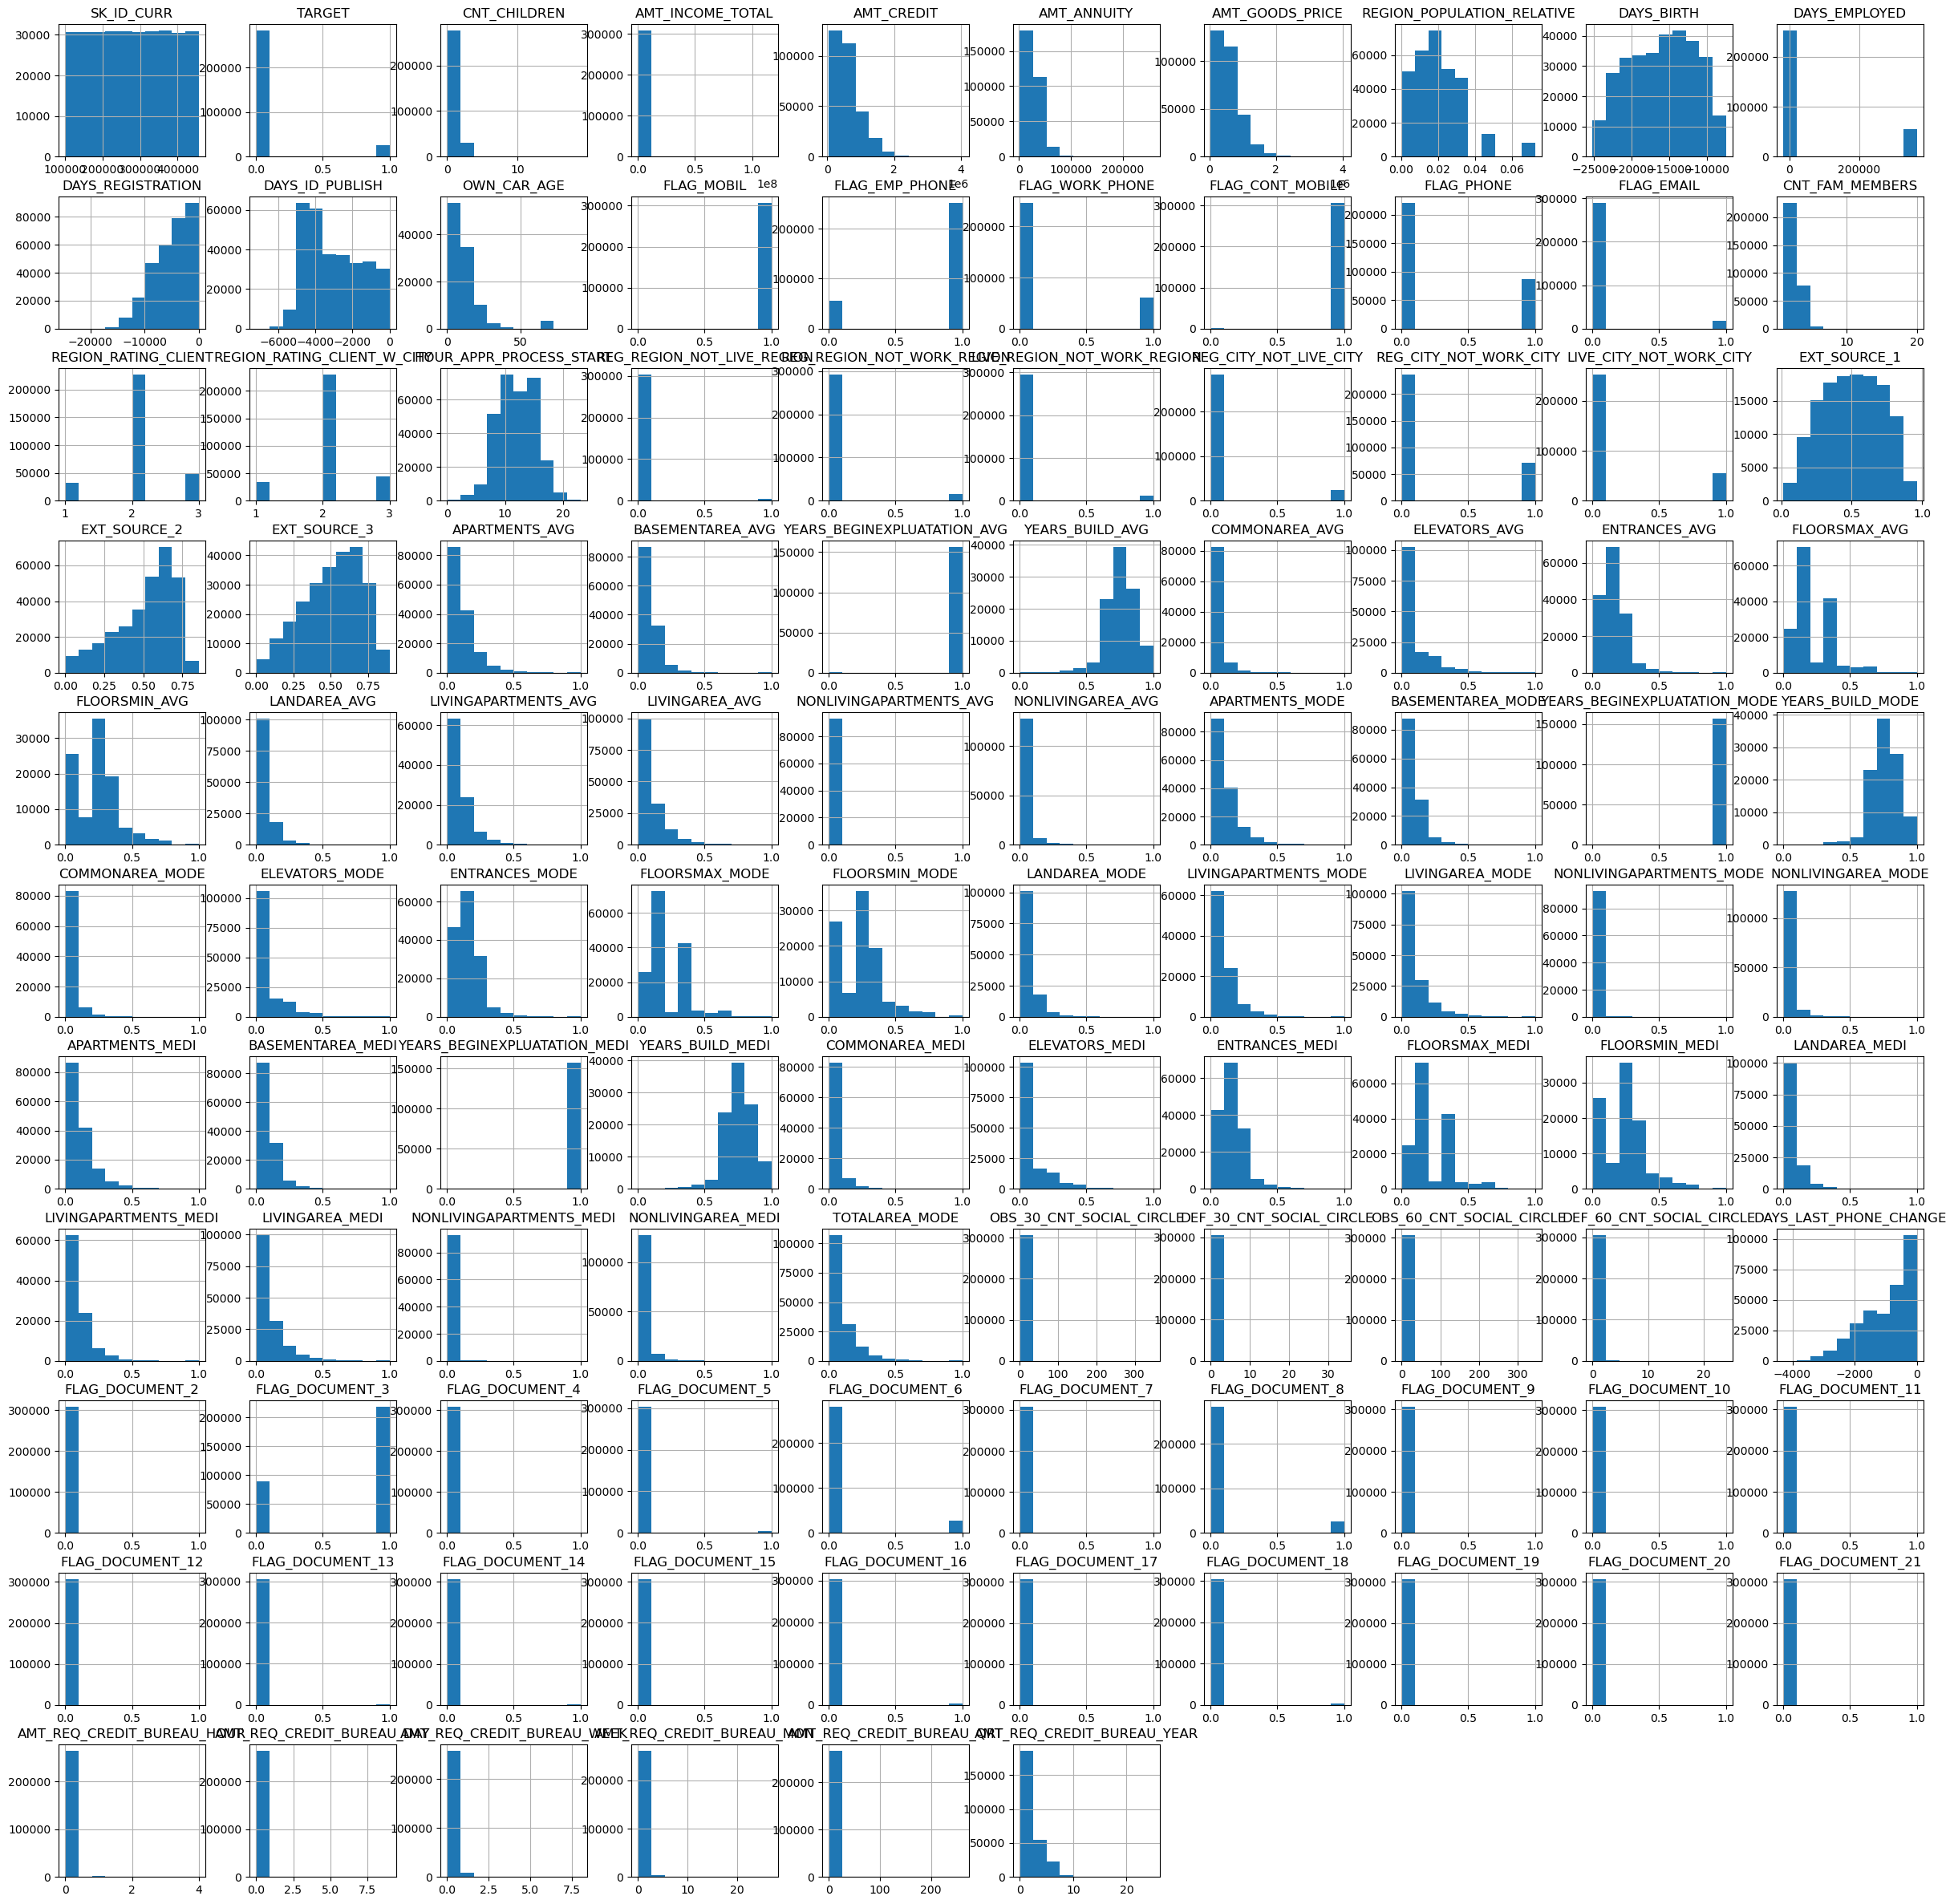

In [5]:
df_application_train.hist(figsize=(30,30))

In [6]:
df_application_test.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 121 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    NAME_CONTRACT_TYPE            object 
 2    CODE_GENDER                   object 
 3    FLAG_OWN_CAR                  object 
 4    FLAG_OWN_REALTY               object 
 5    CNT_CHILDREN                  int64  
 6    AMT_INCOME_TOTAL              float64
 7    AMT_CREDIT                    float64
 8    AMT_ANNUITY                   float64
 9    AMT_GOODS_PRICE               float64
 10   NAME_TYPE_SUITE               object 
 11   NAME_INCOME_TYPE              object 
 12   NAME_EDUCATION_TYPE           object 
 13   NAME_FAMILY_STATUS            object 
 14   NAME_HOUSING_TYPE             object 
 15   REGION_POPULATION_RELATIVE    float64
 16   DAYS_BIRTH                    int64  
 17   DAYS_EMPLOYED                 int64  
 18   DAYS

array([[<Axes: title={'center': 'SK_ID_CURR'}>,
        <Axes: title={'center': 'CNT_CHILDREN'}>,
        <Axes: title={'center': 'AMT_INCOME_TOTAL'}>,
        <Axes: title={'center': 'AMT_CREDIT'}>,
        <Axes: title={'center': 'AMT_ANNUITY'}>,
        <Axes: title={'center': 'AMT_GOODS_PRICE'}>,
        <Axes: title={'center': 'REGION_POPULATION_RELATIVE'}>,
        <Axes: title={'center': 'DAYS_BIRTH'}>,
        <Axes: title={'center': 'DAYS_EMPLOYED'}>,
        <Axes: title={'center': 'DAYS_REGISTRATION'}>],
       [<Axes: title={'center': 'DAYS_ID_PUBLISH'}>,
        <Axes: title={'center': 'OWN_CAR_AGE'}>,
        <Axes: title={'center': 'FLAG_MOBIL'}>,
        <Axes: title={'center': 'FLAG_EMP_PHONE'}>,
        <Axes: title={'center': 'FLAG_WORK_PHONE'}>,
        <Axes: title={'center': 'FLAG_CONT_MOBILE'}>,
        <Axes: title={'center': 'FLAG_PHONE'}>,
        <Axes: title={'center': 'FLAG_EMAIL'}>,
        <Axes: title={'center': 'CNT_FAM_MEMBERS'}>,
        <Axes: title=

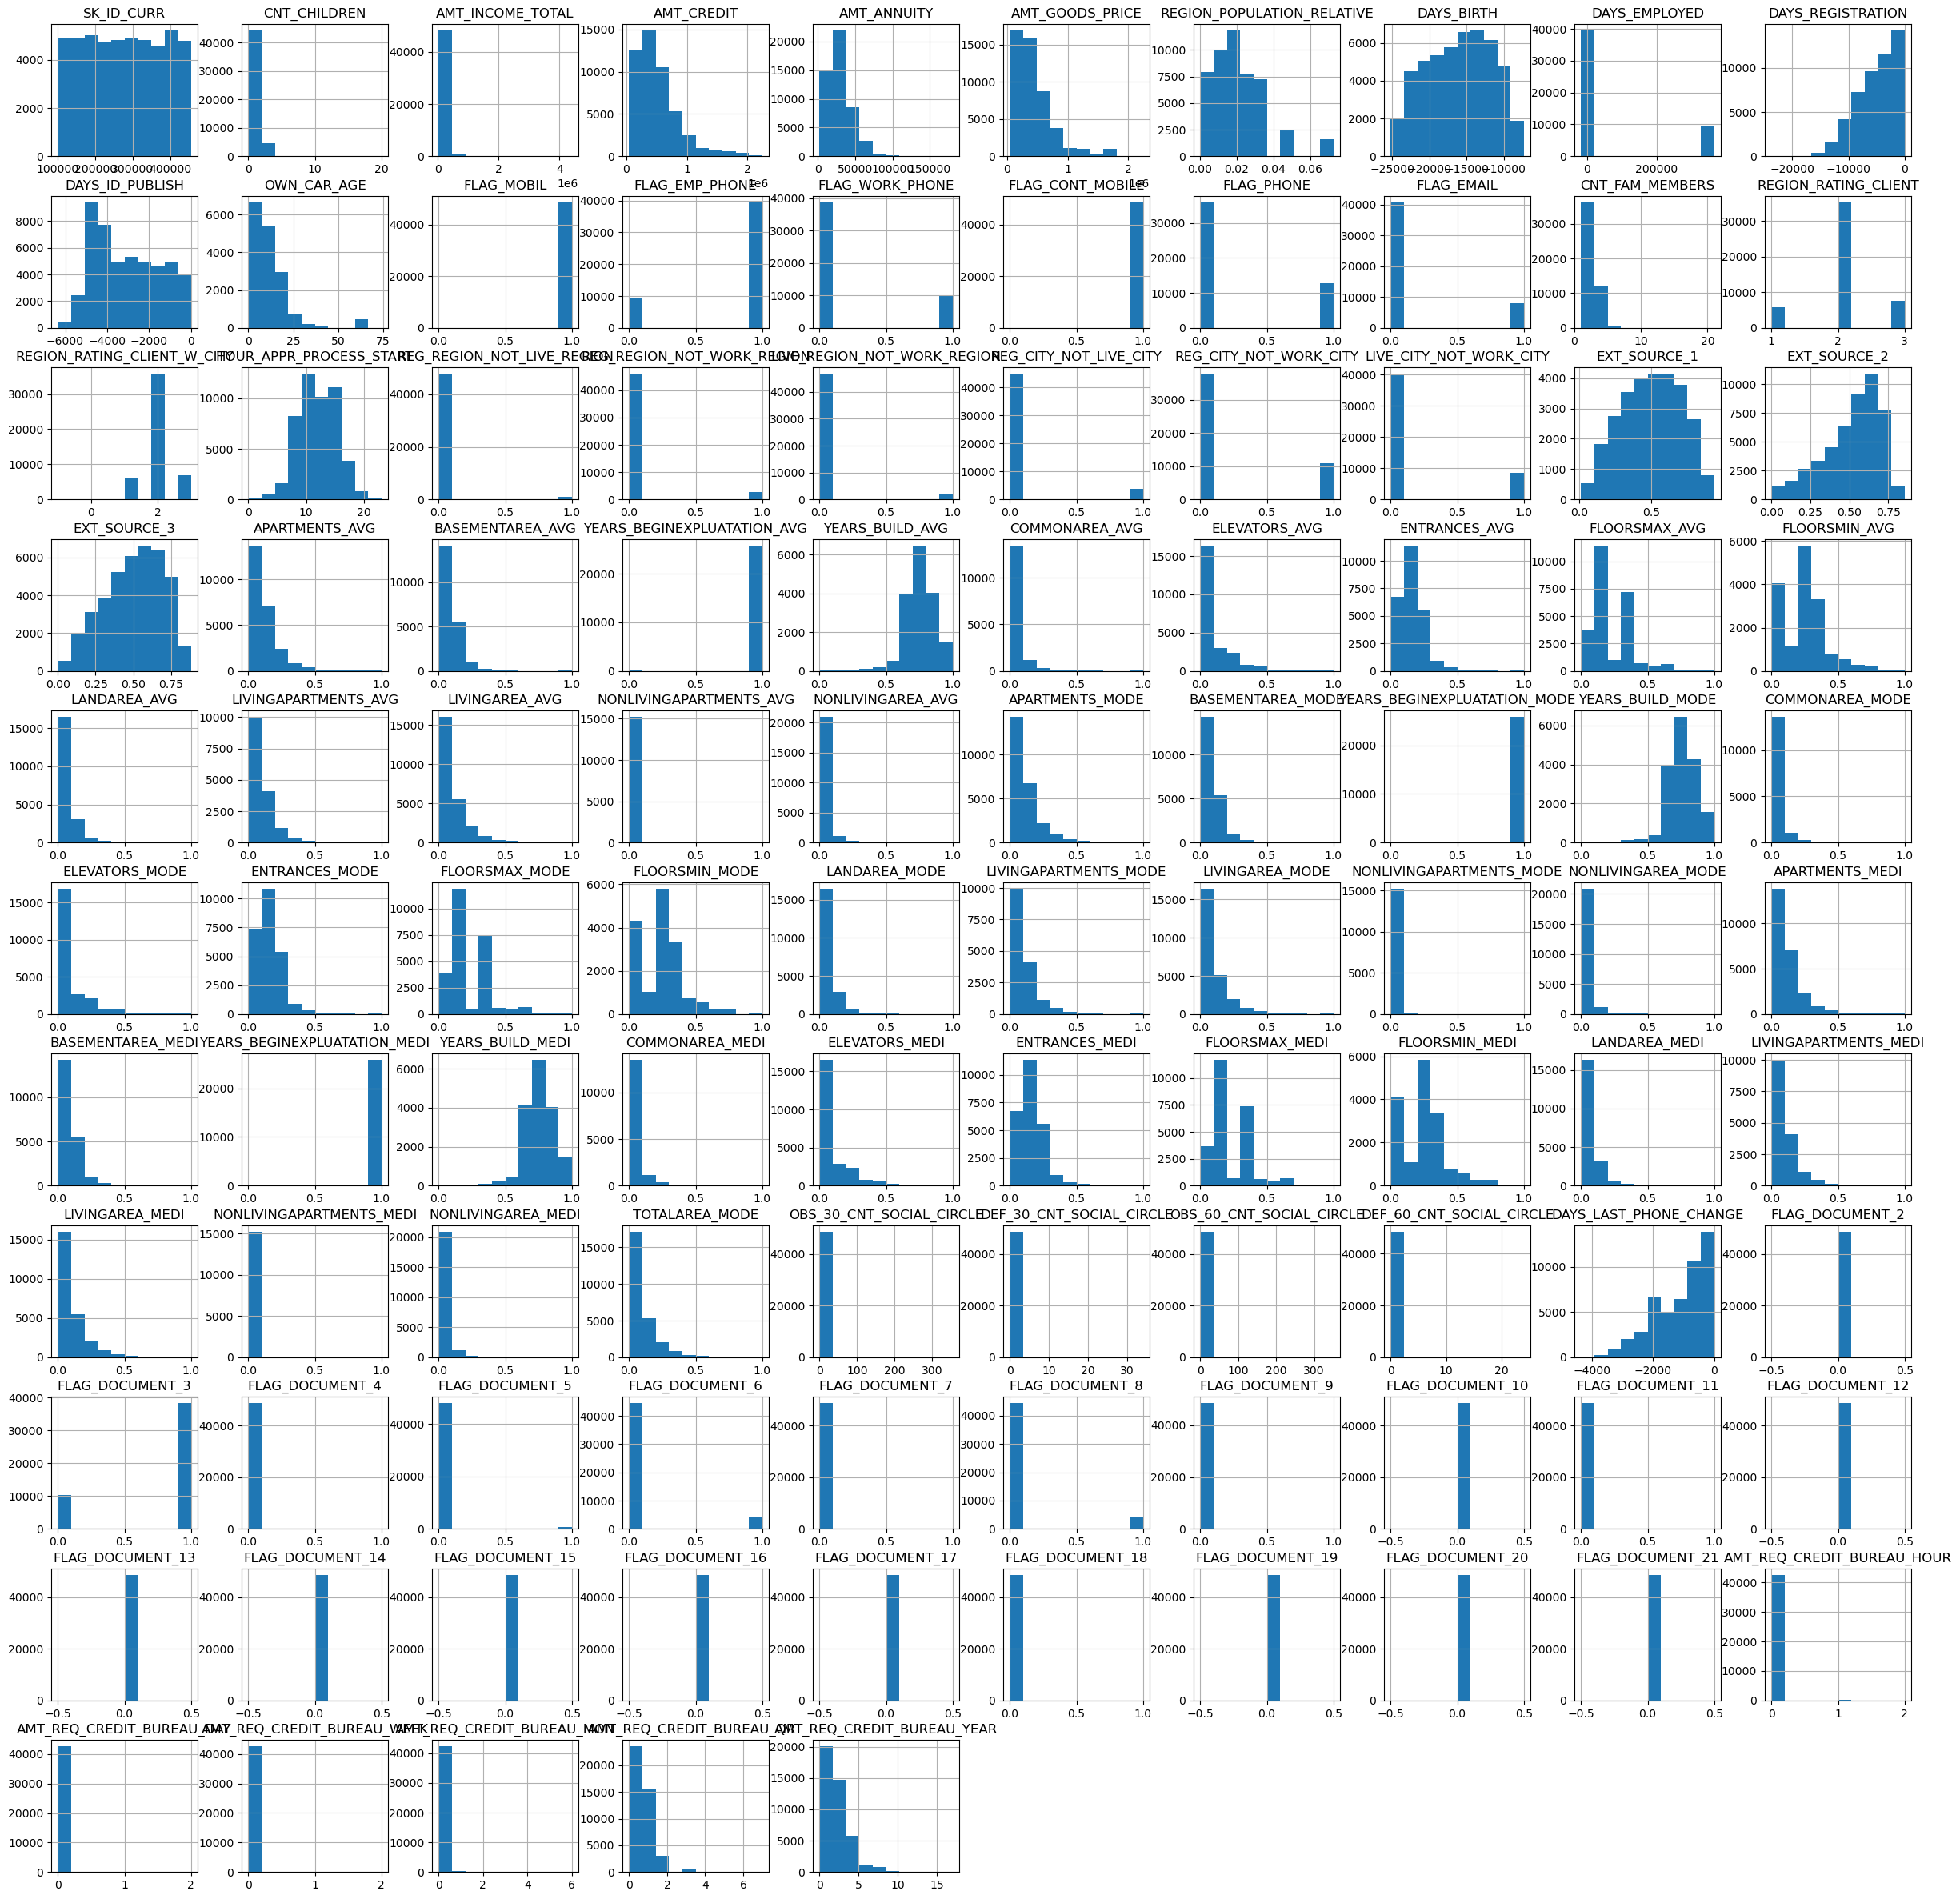

In [7]:
df_application_test.hist(figsize=(30,30))

In [8]:
# Threshold for more than half nulls
threshold = len(df_application_train) / 2

# Find columns with more than half nulls
columns_with_many_nulls = df_application_train.columns[df_application_train.isnull().sum() > threshold]

print("Columns with more than half nulls:", columns_with_many_nulls.tolist())

Columns with more than half nulls: ['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE']


In [9]:
# Getting the correlated values:
corr_matrix = df_application_train.corr().abs()
corr_matrix

/var/folders/6j/3l6q9l4515sdmfyg8znhblxr0000gn/T/ipykernel_49090/3977509042.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_application_train.corr().abs()


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,0.002108,0.001129,0.001820,0.000343,0.000433,0.000232,0.000849,0.001500,0.001366,...,0.000509,0.000167,0.001073,0.000282,0.002672,0.002193,0.002099,0.000485,0.001025,0.004659
TARGET,0.002108,1.000000,0.019187,0.003982,0.030369,0.012817,0.039645,0.037227,0.078239,0.044932,...,0.007952,0.001358,0.000215,0.003709,0.000930,0.002704,0.000788,0.012462,0.002022,0.019930
CNT_CHILDREN,0.001129,0.019187,1.000000,0.012882,0.002145,0.021374,0.001827,0.025573,0.330938,0.239818,...,0.004031,0.000864,0.000988,0.002450,0.000410,0.000366,0.002436,0.010808,0.007836,0.041550
AMT_INCOME_TOTAL,0.001820,0.003982,0.012882,1.000000,0.156870,0.191657,0.159610,0.074796,0.027261,0.064223,...,0.003130,0.002408,0.000242,0.000589,0.000709,0.002944,0.002387,0.024700,0.004859,0.011690
AMT_CREDIT,0.000343,0.030369,0.002145,0.156870,1.000000,0.770138,0.986968,0.099738,0.055436,0.066838,...,0.034329,0.021082,0.031023,0.016148,0.003906,0.004238,0.001275,0.054451,0.015925,0.048448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,0.002193,0.002704,0.000366,0.002944,0.004238,0.002185,0.004677,0.001399,0.002255,0.000472,...,0.013281,0.001126,0.000120,0.001130,0.230374,1.000000,0.217412,0.005258,0.004416,0.003355
AMT_REQ_CREDIT_BUREAU_WEEK,0.002099,0.000788,0.002436,0.002387,0.001275,0.013881,0.001007,0.002149,0.001336,0.003072,...,0.004640,0.001275,0.001770,0.000081,0.004706,0.217412,1.000000,0.014096,0.015115,0.018917
AMT_REQ_CREDIT_BUREAU_MON,0.000485,0.012462,0.010808,0.024700,0.054451,0.039148,0.056422,0.078607,0.001372,0.034457,...,0.001565,0.002729,0.001285,0.003612,0.000018,0.005258,0.014096,1.000000,0.007789,0.004975
AMT_REQ_CREDIT_BUREAU_QRT,0.001025,0.002022,0.007836,0.004859,0.015925,0.010124,0.016432,0.001279,0.011799,0.015345,...,0.005125,0.001575,0.001010,0.002004,0.002716,0.004416,0.015115,0.007789,1.000000,0.076208


In [10]:
# Getting the upper triangular matrix of the corr val:
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
upper_tri 

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,NaN,0.002108,0.001129,0.001820,0.000343,0.000433,0.000232,0.000849,0.001500,0.001366,...,0.000509,0.000167,0.001073,0.000282,0.002672,0.002193,0.002099,0.000485,0.001025,0.004659
TARGET,NaN,NaN,0.019187,0.003982,0.030369,0.012817,0.039645,0.037227,0.078239,0.044932,...,0.007952,0.001358,0.000215,0.003709,0.000930,0.002704,0.000788,0.012462,0.002022,0.019930
CNT_CHILDREN,NaN,NaN,NaN,0.012882,0.002145,0.021374,0.001827,0.025573,0.330938,0.239818,...,0.004031,0.000864,0.000988,0.002450,0.000410,0.000366,0.002436,0.010808,0.007836,0.041550
AMT_INCOME_TOTAL,NaN,NaN,NaN,NaN,0.156870,0.191657,0.159610,0.074796,0.027261,0.064223,...,0.003130,0.002408,0.000242,0.000589,0.000709,0.002944,0.002387,0.024700,0.004859,0.011690
AMT_CREDIT,NaN,NaN,NaN,NaN,NaN,0.770138,0.986968,0.099738,0.055436,0.066838,...,0.034329,0.021082,0.031023,0.016148,0.003906,0.004238,0.001275,0.054451,0.015925,0.048448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.217412,0.005258,0.004416,0.003355
AMT_REQ_CREDIT_BUREAU_WEEK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.014096,0.015115,0.018917
AMT_REQ_CREDIT_BUREAU_MON,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.007789,0.004975
AMT_REQ_CREDIT_BUREAU_QRT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.076208


In [11]:
# Checking columns that have a high correlated value of 0.9.
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
to_drop

['AMT_GOODS_PRICE',
 'FLAG_EMP_PHONE',
 'REGION_RATING_CLIENT_W_CITY',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'TOTALAREA_MODE',
 'OBS_60_CNT_SOCIAL_CIRCLE']

In [12]:
# Dropping the columns that have a high correlated value of 0.9.
df_application_train.drop(columns=to_drop, inplace=True)

In [13]:
df_application_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 87 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  NAME_TYPE_SUITE              306219 non-null  object 
 11  NAME_INCOME_TYPE             307511 non-null  object 
 12  NAME_EDUCATION_TYPE          307511 non-null  object 
 13 

In [14]:
# Looking at just the numerical features to fully understand how these feature effect SalePrice
numerical_features = df_application_train.select_dtypes(include=['float64', 'int64'])
# Compute the correlation matrix
correlation_matrix = numerical_features.corr()

# Find correlations
correlations = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        correlations.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

# Print the results
for var1, var2, corr in correlations:
    print(f"{var1}, {var2}, {corr}")

TARGET, SK_ID_CURR, -0.0021084690181960766
CNT_CHILDREN, SK_ID_CURR, -0.001129236446180263
CNT_CHILDREN, TARGET, 0.01918713359627062
AMT_INCOME_TOTAL, SK_ID_CURR, -0.001820296177495117
AMT_INCOME_TOTAL, TARGET, -0.003981865601205793
AMT_INCOME_TOTAL, CNT_CHILDREN, 0.012882077388633121
AMT_CREDIT, SK_ID_CURR, -0.0003431612062434398
AMT_CREDIT, TARGET, -0.03036928646142988
AMT_CREDIT, CNT_CHILDREN, 0.0021454434616763095
AMT_CREDIT, AMT_INCOME_TOTAL, 0.15687027185193833
AMT_ANNUITY, SK_ID_CURR, -0.00043291960830743847
AMT_ANNUITY, TARGET, -0.012816561515413605
AMT_ANNUITY, CNT_CHILDREN, 0.021373778110674785
AMT_ANNUITY, AMT_INCOME_TOTAL, 0.1916574280369556
AMT_ANNUITY, AMT_CREDIT, 0.7701380033118846
REGION_POPULATION_RELATIVE, SK_ID_CURR, 0.0008491290653992665
REGION_POPULATION_RELATIVE, TARGET, -0.037227148542444743
REGION_POPULATION_RELATIVE, CNT_CHILDREN, -0.02557283183421459
REGION_POPULATION_RELATIVE, AMT_INCOME_TOTAL, 0.07479570273649291
REGION_POPULATION_RELATIVE, AMT_CREDIT, 0.099

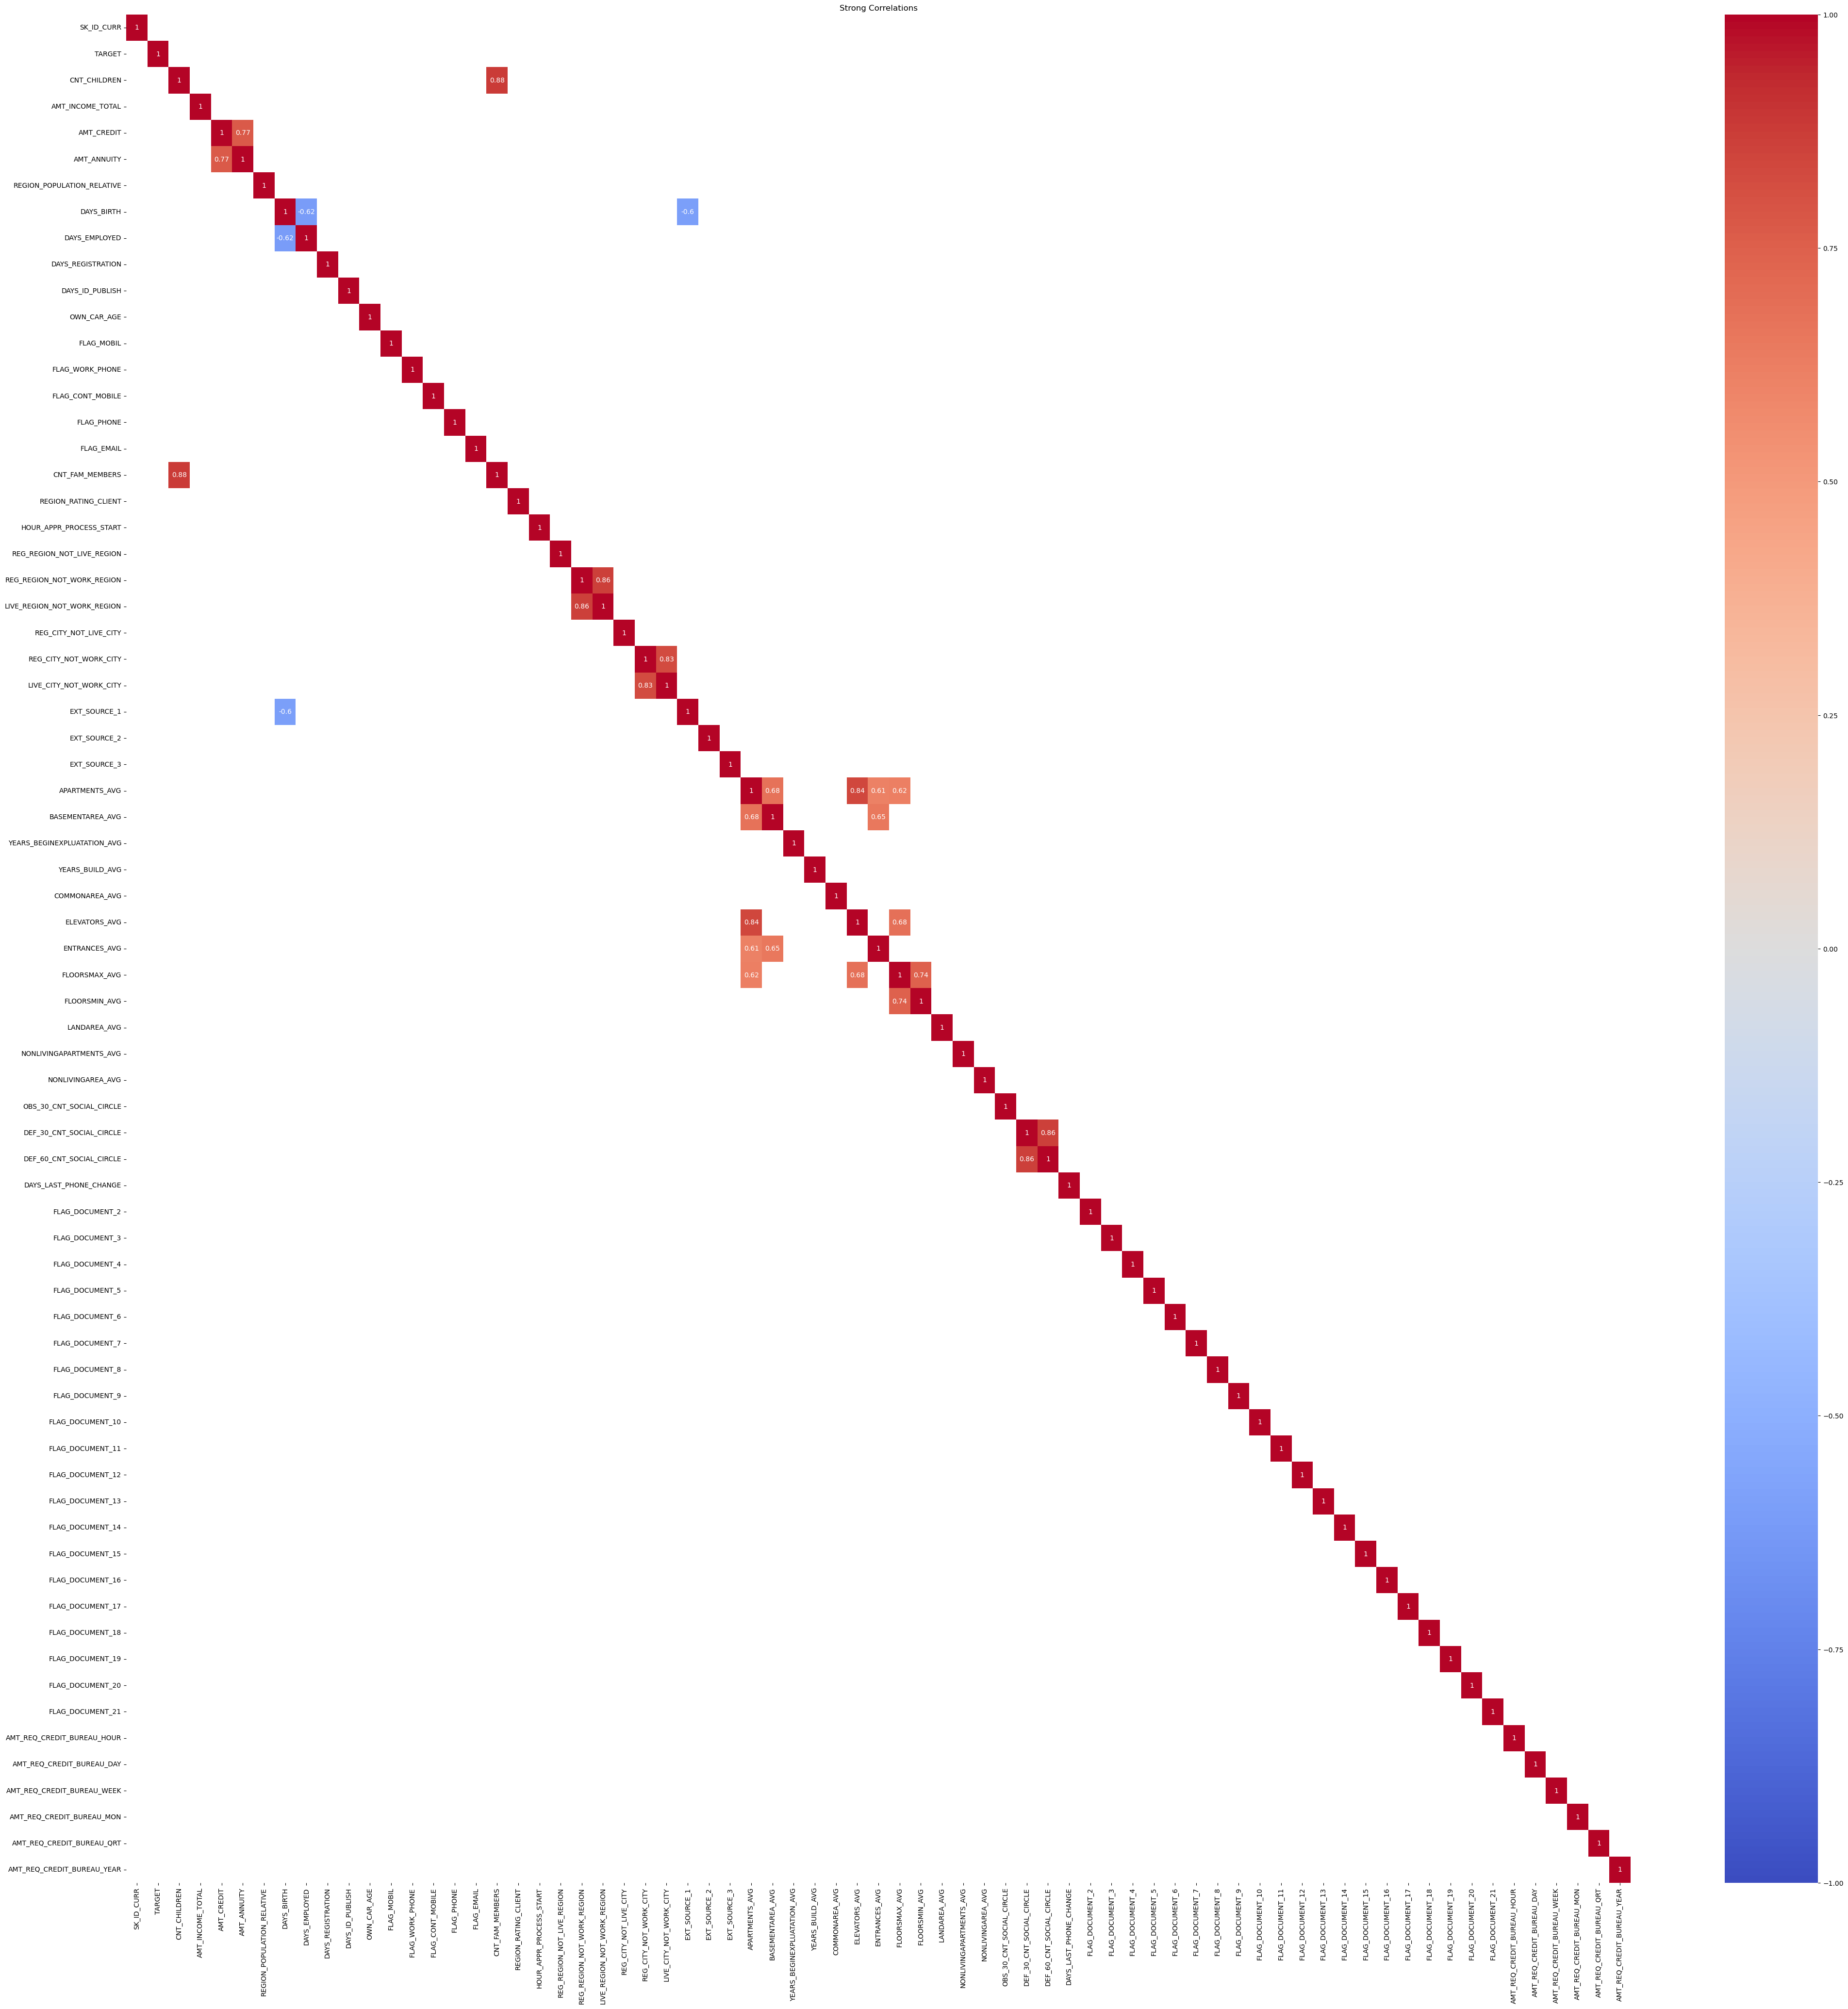

In [15]:
# Looking at just the numerical features to fully understand how these feature effect SalePrice
numerical_features = df_application_train.select_dtypes(include=['float64', 'int64'])
# Compute the correlation matrix
correlation_matrix = numerical_features.corr()
# Filter heatmap to show only correlations greater than 0.6
plt.figure(figsize=(50, 50))  # Adjust the figure size to make it more readable
strong_corr = correlation_matrix[(correlation_matrix > 0.6) | (correlation_matrix < -0.6)]
sns.heatmap(strong_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Strong Correlations')
plt.show()

In [16]:
# Set a threshold for strong correlations
threshold = 0.6

# Find strong correlations
strong_correlations = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            strong_correlations.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

# Print the results
for var1, var2, corr in strong_correlations:
    print(f"{var1}, {var2}, {corr}")

AMT_ANNUITY, AMT_CREDIT, 0.7701380033118846
DAYS_EMPLOYED, DAYS_BIRTH, -0.6158641964711599
CNT_FAM_MEMBERS, CNT_CHILDREN, 0.879160640438957
LIVE_REGION_NOT_WORK_REGION, REG_REGION_NOT_WORK_REGION, 0.8606267802832626
LIVE_CITY_NOT_WORK_CITY, REG_CITY_NOT_WORK_CITY, 0.8255747229688812
EXT_SOURCE_1, DAYS_BIRTH, -0.6006099739503155
BASEMENTAREA_AVG, APARTMENTS_AVG, 0.6793885815577781
ELEVATORS_AVG, APARTMENTS_AVG, 0.8369580414055918
ENTRANCES_AVG, APARTMENTS_AVG, 0.6112408989236247
ENTRANCES_AVG, BASEMENTAREA_AVG, 0.6511595722424859
FLOORSMAX_AVG, APARTMENTS_AVG, 0.6187458419515024
FLOORSMAX_AVG, ELEVATORS_AVG, 0.6800780697064711
FLOORSMIN_AVG, FLOORSMAX_AVG, 0.7424367124625478
DEF_60_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, 0.8605173800835259


The features that were more likely to be dropped were those starting with FLAG_DOCUMENT_ (indices 96–115), along with FLAG_MOBIL, FLAG_EMP_PHONE, FLAG_WORK_PHONE, FLAG_CONT_MOBILE, FLAG_PHONE, and FLAG_EMAIL (indices 22–27). These binary features likely provided limited predictive value due to their simplicity (1 or 0 outcomes) and potential lack of meaningful correlation with other features, making them less useful in a credit risk model.

Some features that seemed uninformative were CNT_CHILDREN, DAYS_ID_PUBLISH, OWN_CAR_AGE, and REGION_POPULATION_RELATIVE:
CNT_CHILDREN and DAYS_ID_PUBLISH appeared to have weak relationships with the target variable, implying limited predictive utility.
OWN_CAR_AGE had over 65.9% missing values, which makes it unreliable for modeling, as well as other features with high missing values. Including REGION_POPULATION_RELATIVE in the model negatively impacted the AUC score, despite its correlation with another feature.

When selecting features for inclusion, the dataset's skewness was considered. Features with _AVG were excluded due to their reduced interpretability in skewed distributions, and features with _MEDI were prioritized.

In the EDA process, memory constraints necessitated focusing on features with correlations above 0.6. Features selected based on high correlations with the target or other key variables included AMT_ANNUITY, AMT_CREDIT, AMT_GOODS_PRICE, DAYS_EMPLOYED, DAYS_BIRTH, and columns that ended up with '_MEDI'. The remaining features were chosen for their relevance to loan applications: SK_ID_CURR, AMT_INCOME_TOTAL, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, NAME_INCOME_TYPE, OCCUPATION_TYPE, NAME_EDUCATION_TYPE, NAME_CONTRACT_TYPE, ORGANIZATION_TYPE, the 'EXT_SOURCE_#'(i.e: 1,2,3), and TARGET. Logically it makes sense to keep 'EXT_SOURCE_1', but because of the high null count the ideal thing is to drop it.

This selection process aimed to balance high correlation, interoperability, and domain relevance while addressing the limitations of skewness and memory constraints.



In [17]:
selected_features= ['SK_ID_CURR', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 
                     'AMT_CREDIT','AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'NAME_FAMILY_STATUS', 
                     'NAME_HOUSING_TYPE', 'NAME_INCOME_TYPE', 'OCCUPATION_TYPE', 'NAME_EDUCATION_TYPE', 
                     'NAME_CONTRACT_TYPE', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3','TARGET']

medi_columns = [col for col in df_application_train.columns if '_MEDI' in col]

final_features = list(set(selected_features + medi_columns))

df_application_train = df_application_train[final_features]

In [18]:
df_head = df_application_train.head()
# Displaying a table in Markdown format to put in .md file
df_head_md = df_head.to_markdown(index=False)
Markdown(df_head_md)

|   DAYS_EMPLOYED |   EXT_SOURCE_2 |   AMT_ANNUITY | NAME_CONTRACT_TYPE   |   TARGET |   EXT_SOURCE_1 |   SK_ID_CURR | NAME_HOUSING_TYPE   | ORGANIZATION_TYPE      |   AMT_INCOME_TOTAL |   EXT_SOURCE_3 | NAME_INCOME_TYPE   |      AMT_CREDIT | NAME_EDUCATION_TYPE           |   DAYS_BIRTH | NAME_FAMILY_STATUS   | OCCUPATION_TYPE   |
|----------------:|---------------:|--------------:|:---------------------|---------:|---------------:|-------------:|:--------------------|:-----------------------|-------------------:|---------------:|:-------------------|----------------:|:------------------------------|-------------:|:---------------------|:------------------|
|            -637 |       0.262949 |       24700.5 | Cash loans           |        1 |       0.083037 |       100002 | House / apartment   | Business Entity Type 3 |             202500 |       0.139376 | Working            | 406598          | Secondary / secondary special |        -9461 | Single / not married | Laborers          |
|           -1188 |       0.622246 |       35698.5 | Cash loans           |        0 |       0.311267 |       100003 | House / apartment   | School                 |             270000 |     nan        | State servant      |      1.2935e+06 | Higher education              |       -16765 | Married              | Core staff        |
|            -225 |       0.555912 |        6750   | Revolving loans      |        0 |     nan        |       100004 | House / apartment   | Government             |              67500 |       0.729567 | Working            | 135000          | Secondary / secondary special |       -19046 | Single / not married | Laborers          |
|           -3039 |       0.650442 |       29686.5 | Cash loans           |        0 |     nan        |       100006 | House / apartment   | Business Entity Type 3 |             135000 |     nan        | Working            | 312682          | Secondary / secondary special |       -19005 | Civil marriage       | Laborers          |
|           -3038 |       0.322738 |       21865.5 | Cash loans           |        0 |     nan        |       100007 | House / apartment   | Religion               |             121500 |     nan        | Working            | 513000          | Secondary / secondary special |       -19932 | Single / not married | Core staff        |

In [19]:
display(Markdown("### INFO"))
display(df_application_train.info())
display(Markdown("### Description"))
display(df_application_train.describe())

### INFO

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   DAYS_EMPLOYED        307511 non-null  int64  
 1   EXT_SOURCE_2         306851 non-null  float64
 2   AMT_ANNUITY          307499 non-null  float64
 3   NAME_CONTRACT_TYPE   307511 non-null  object 
 4   TARGET               307511 non-null  int64  
 5   EXT_SOURCE_1         134133 non-null  float64
 6   SK_ID_CURR           307511 non-null  int64  
 7   NAME_HOUSING_TYPE    307511 non-null  object 
 8   ORGANIZATION_TYPE    307511 non-null  object 
 9   AMT_INCOME_TOTAL     307511 non-null  float64
 10  EXT_SOURCE_3         246546 non-null  float64
 11  NAME_INCOME_TYPE     307511 non-null  object 
 12  AMT_CREDIT           307511 non-null  float64
 13  NAME_EDUCATION_TYPE  307511 non-null  object 
 14  DAYS_BIRTH           307511 non-null  int64  
 15  NAME_FAMILY_STATU

None

### Description

,DAYS_EMPLOYED,EXT_SOURCE_2,AMT_ANNUITY,TARGET,EXT_SOURCE_1,SK_ID_CURR,AMT_INCOME_TOTAL,EXT_SOURCE_3,AMT_CREDIT,DAYS_BIRTH
count,307511.000000,3.068510e+05,307499.000000,307511.000000,134133.000000,307511.000000,3.075110e+05,246546.000000,3.075110e+05,307511.000000
mean,63815.045904,5.143927e-01,27108.573909,0.080729,0.502130,278180.518577,1.687979e+05,0.510853,5.990260e+05,-16036.995067
std,141275.766519,1.910602e-01,14493.737315,0.272419,0.211062,102790.175348,2.371231e+05,0.194844,4.024908e+05,4363.988632
min,-17912.000000,8.173617e-08,1615.500000,0.000000,0.014568,100002.000000,2.565000e+04,0.000527,4.500000e+04,-25229.000000
25%,-2760.000000,3.924574e-01,16524.000000,0.000000,0.334007,189145.500000,1.125000e+05,0.370650,2.700000e+05,-19682.000000
50%,-1213.000000,5.659614e-01,24903.000000,0.000000,0.505998,278202.000000,1.471500e+05,0.535276,5.135310e+05,-15750.000000
75%,-289.000000,6.636171e-01,34596.000000,0.000000,0.675053,367142.500000,2.025000e+05,0.669057,8.086500e+05,-12413.000000
max,365243.000000,8.549997e-01,258025.500000,1.000000,0.962693,456255.000000,1.170000e+08,0.896010,4.050000e+06,-7489.000000


# POS_CASH_balance

In [20]:
POS_CASH_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB


array([[<Axes: title={'center': 'SK_ID_PREV'}>,
        <Axes: title={'center': 'SK_ID_CURR'}>,
        <Axes: title={'center': 'MONTHS_BALANCE'}>],
       [<Axes: title={'center': 'CNT_INSTALMENT'}>,
        <Axes: title={'center': 'CNT_INSTALMENT_FUTURE'}>,
        <Axes: title={'center': 'SK_DPD'}>],
       [<Axes: title={'center': 'SK_DPD_DEF'}>, <Axes: >, <Axes: >]],
      dtype=object)

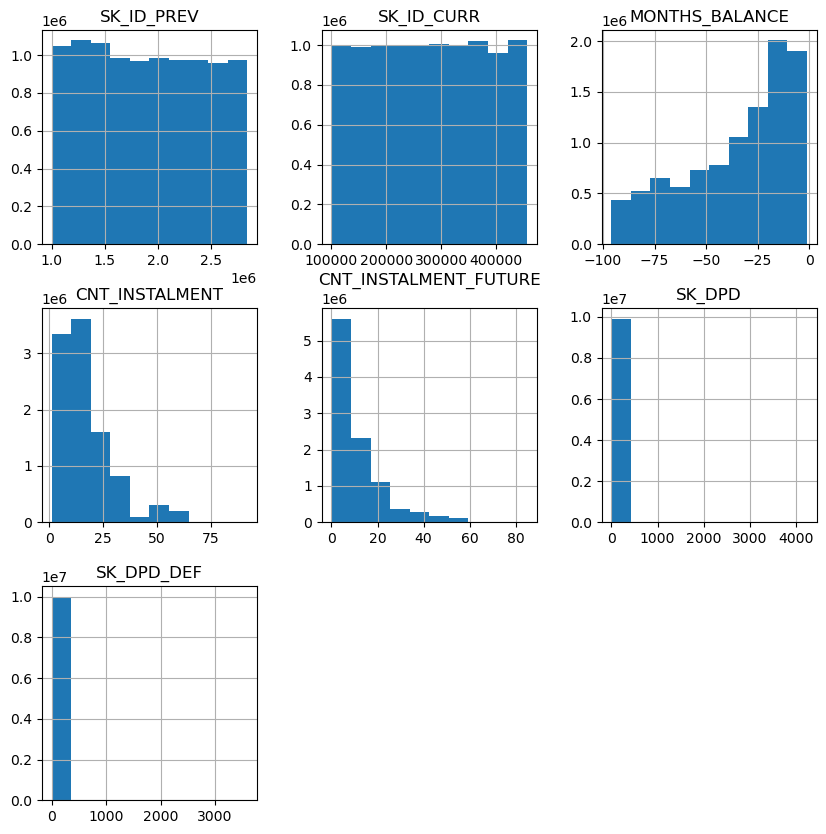

In [21]:
POS_CASH_balance.hist(figsize=(10,10))

In [22]:
POS_CASH_balance['SK_DPD'].describe() 
# Im try dropping these to see if model does nothing just to see before finishing the report

count    1.000136e+07
mean     1.160693e+01
std      1.327140e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      4.231000e+03
Name: SK_DPD, dtype: float64

In [23]:
POS_CASH_balance['SK_DPD_DEF'].describe()

count    1.000136e+07
mean     6.544684e-01
std      3.276249e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.595000e+03
Name: SK_DPD_DEF, dtype: float64

In [24]:
# Threshold for more than half nulls
threshold = len(POS_CASH_balance) / 2

# Find columns with more than half nulls
columns_with_many_nulls = POS_CASH_balance.columns[POS_CASH_balance.isnull().sum() > threshold]

print("Columns with more than half nulls:", columns_with_many_nulls.tolist())

Columns with more than half nulls: []


In [25]:
# Getting the correlated values
corr_matrix = POS_CASH_balance.corr().abs()
corr_matrix

/var/folders/6j/3l6q9l4515sdmfyg8znhblxr0000gn/T/ipykernel_49090/248941964.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = POS_CASH_balance.corr().abs()


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD,SK_DPD_DEF
SK_ID_PREV,1.000000,0.000336,0.001835,0.003820,0.003679,0.000487,0.004848
SK_ID_CURR,0.000336,1.000000,0.000404,0.000144,0.000559,0.003118,0.001948
MONTHS_BALANCE,0.001835,0.000404,1.000000,0.336163,0.271595,0.018939,0.000381
CNT_INSTALMENT,0.003820,0.000144,0.336163,1.000000,0.871276,0.060803,0.014154
CNT_INSTALMENT_FUTURE,0.003679,0.000559,0.271595,0.871276,1.000000,0.082004,0.017436
SK_DPD,0.000487,0.003118,0.018939,0.060803,0.082004,1.000000,0.245782
SK_DPD_DEF,0.004848,0.001948,0.000381,0.014154,0.017436,0.245782,1.000000


In [26]:
# Getting the upper triangular matrix
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
upper_tri 

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD,SK_DPD_DEF
SK_ID_PREV,NaN,0.000336,0.001835,0.003820,0.003679,0.000487,0.004848
SK_ID_CURR,NaN,NaN,0.000404,0.000144,0.000559,0.003118,0.001948
MONTHS_BALANCE,NaN,NaN,NaN,0.336163,0.271595,0.018939,0.000381
CNT_INSTALMENT,NaN,NaN,NaN,NaN,0.871276,0.060803,0.014154
CNT_INSTALMENT_FUTURE,NaN,NaN,NaN,NaN,NaN,0.082004,0.017436
SK_DPD,NaN,NaN,NaN,NaN,NaN,NaN,0.245782
SK_DPD_DEF,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
# Checking columns that have a high correlated value of 0.9.
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
to_drop 

[]

In [28]:
# Looking at just the numerical features to fully understand how these feature effect SalePrice
numerical_features = df_application_train.select_dtypes(include=['float64', 'int64'])
# Compute the correlation matrix
correlation_matrix = numerical_features.corr()

# Find correlations
correlations = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        correlations.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

# Print the results
for var1, var2, corr in correlations:
    print(f"{var1}, {var2}, {corr}")

EXT_SOURCE_2, DAYS_EMPLOYED, -0.020767102465620767
AMT_ANNUITY, DAYS_EMPLOYED, -0.1043318589012795
AMT_ANNUITY, EXT_SOURCE_2, 0.12580400336482975
TARGET, DAYS_EMPLOYED, -0.04493166265773831
TARGET, EXT_SOURCE_2, -0.1604716716052088
TARGET, AMT_ANNUITY, -0.012816561515413612
EXT_SOURCE_1, DAYS_EMPLOYED, 0.2898477970950637
EXT_SOURCE_1, EXT_SOURCE_2, 0.2139823831633366
EXT_SOURCE_1, AMT_ANNUITY, 0.11939838192649718
EXT_SOURCE_1, TARGET, -0.1553171260639496
SK_ID_CURR, DAYS_EMPLOYED, 0.0013662336541424834
SK_ID_CURR, EXT_SOURCE_2, 0.002342064818221241
SK_ID_CURR, AMT_ANNUITY, -0.00043291960830743636
SK_ID_CURR, TARGET, -0.0021084690181960766
SK_ID_CURR, EXT_SOURCE_1, 8.169710675125801e-05
AMT_INCOME_TOTAL, DAYS_EMPLOYED, -0.06422339973255638
AMT_INCOME_TOTAL, EXT_SOURCE_2, 0.0609246360903318
AMT_INCOME_TOTAL, AMT_ANNUITY, 0.1916574280369556
AMT_INCOME_TOTAL, TARGET, -0.003981865601205793
AMT_INCOME_TOTAL, EXT_SOURCE_1, 0.02623236995829514
AMT_INCOME_TOTAL, SK_ID_CURR, -0.00182029617749511

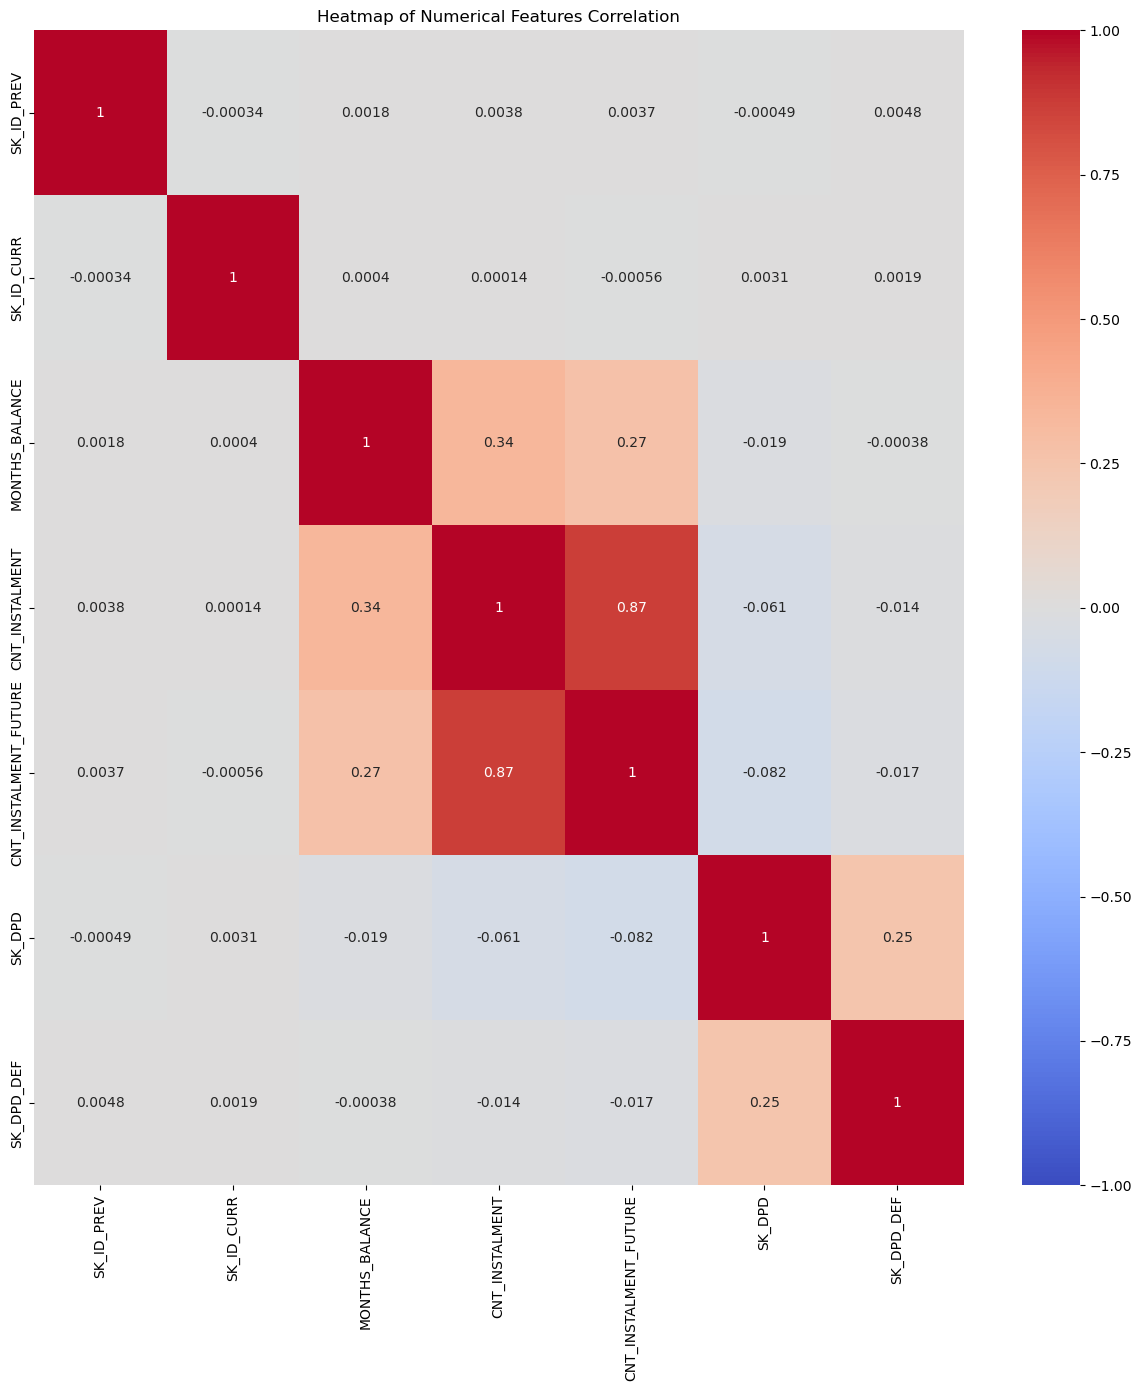

In [29]:
# Looking at just the numerical features to fully understand how these feature effect SalePrice
numerical_features = POS_CASH_balance.select_dtypes(include=['float64', 'int64'])
# Compute the correlation matrix
correlation_matrix = numerical_features.corr()
plt.figure(figsize=(15, 15))  # Adjust the figure size to make it more readable
sns.heatmap(correlation_matrix, annot=True, fmt='.2g', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap of Numerical Features Correlation')
plt.show()

In [30]:
# nulls: CNT_INSTALMENT, CNT_INSTALMENT_FUTURE, NAME_CONTRACT_STATUS, SK_DPD, SK_DPD_DEF
POS_CASH_balance = POS_CASH_balance[['SK_ID_CURR', 'MONTHS_BALANCE', 'CNT_INSTALMENT', 'CNT_INSTALMENT_FUTURE', 'SK_DPD_DEF', 'NAME_CONTRACT_STATUS']]
POS_CASH_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 6 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_CURR             int64  
 1   MONTHS_BALANCE         int64  
 2   CNT_INSTALMENT         float64
 3   CNT_INSTALMENT_FUTURE  float64
 4   SK_DPD_DEF             int64  
 5   NAME_CONTRACT_STATUS   object 
dtypes: float64(2), int64(3), object(1)
memory usage: 457.8+ MB


In [31]:
print(POS_CASH_balance.skew())
POS_CASH_balance.describe()

/var/folders/6j/3l6q9l4515sdmfyg8znhblxr0000gn/T/ipykernel_49090/2530356162.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(POS_CASH_balance.skew())


SK_ID_CURR               -0.003128
MONTHS_BALANCE           -0.672777
CNT_INSTALMENT            1.601734
CNT_INSTALMENT_FUTURE     1.846746
SK_DPD_DEF               66.339906
dtype: float64


,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD_DEF
count,1.000136e+07,1.000136e+07,9.975287e+06,9.975271e+06,1.000136e+07
mean,2.784039e+05,-3.501259e+01,1.708965e+01,1.048384e+01,6.544684e-01
std,1.027637e+05,2.606657e+01,1.199506e+01,1.110906e+01,3.276249e+01
min,1.000010e+05,-9.600000e+01,1.000000e+00,0.000000e+00,0.000000e+00
25%,1.895500e+05,-5.400000e+01,1.000000e+01,3.000000e+00,0.000000e+00
50%,2.786540e+05,-2.800000e+01,1.200000e+01,7.000000e+00,0.000000e+00
75%,3.674290e+05,-1.300000e+01,2.400000e+01,1.400000e+01,0.000000e+00
max,4.562550e+05,-1.000000e+00,9.200000e+01,8.500000e+01,3.595000e+03


Features that were chosen to be dropped were: SK_ID_PREV, SK_DPD, I am dropping SK_ID_PREV since this feature is not really part of the predicted value and dropping SK_DPD since this feature is present in another table.

In [32]:
# Feature engineering
POS_CASH_balance['INSTALMENT_RATIO'] = POS_CASH_balance['CNT_INSTALMENT'] / (POS_CASH_balance['CNT_INSTALMENT_FUTURE'] + 1e-5)


In [33]:
# Aggregated features that were selected
POS_CASH_agg = POS_CASH_balance.groupby('SK_ID_CURR').agg({
    'MONTHS_BALANCE': ['mean', 'min', 'max'],  
    'CNT_INSTALMENT': ['mean', 'min', 'max'],  
    'CNT_INSTALMENT_FUTURE': ['mean', 'min', 'max'], 
    'SK_DPD_DEF': ['mean','max'],
    'NAME_CONTRACT_STATUS' : ['count'],
    'INSTALMENT_RATIO': ['mean', 'max'] 
}).reset_index()

# Flatten column names
POS_CASH_agg.columns = ['_'.join(col).strip('_') for col in POS_CASH_agg.columns.values]




The characteristics from the original POS_CASH_balance DataFrame are aggregated in a new DataFrame called POS_CASH_agg, which is created by this code block. The data is condensed at the SK_ID_CURR level by computing summary statistics like mean, min, and max or count for categorical features, for features (MONTHS_BALANCE, CNT_INSTALMENT,  CNT_INSTALMENT_FUTURE, SK_DPD_DEF, NAME_CONTRACT_STATUS). I also featured engineered the CNT_INSTALMENT,  CNT_INSTALMENT_FUTURE to make INSTALMENT_RATIO. 

When working with huge datasets like this one, memory utilization is critical, and this aggregation drastically decreases the dataset's size. By removing specific features that might not have a major impact on the model's performance, data aggregation also yields insightful summaries. 

In [34]:
df_head2 = POS_CASH_agg.head()
# Displaying a table in Markdown format to put in .md file
df_head2_md = df_head2.to_markdown(index=False)
Markdown(df_head2_md)

|   SK_ID_CURR |   MONTHS_BALANCE_mean |   MONTHS_BALANCE_min |   MONTHS_BALANCE_max |   CNT_INSTALMENT_mean |   CNT_INSTALMENT_min |   CNT_INSTALMENT_max |   CNT_INSTALMENT_FUTURE_mean |   CNT_INSTALMENT_FUTURE_min |   CNT_INSTALMENT_FUTURE_max |   SK_DPD_DEF_mean |   SK_DPD_DEF_max |   NAME_CONTRACT_STATUS_count |   INSTALMENT_RATIO_mean |   INSTALMENT_RATIO_max |
|-------------:|----------------------:|---------------------:|---------------------:|----------------------:|---------------------:|---------------------:|-----------------------------:|----------------------------:|----------------------------:|------------------:|-----------------:|-----------------------------:|------------------------:|-----------------------:|
|       100001 |              -72.5556 |                  -96 |                  -53 |                4      |                    4 |                    4 |                      1.44444 |                           0 |                           4 |          0.777778 |                7 |                            9 |            133335       |           400000       |
|       100002 |              -10      |                  -19 |                   -1 |               24      |                   24 |                   24 |                     15       |                           6 |                          24 |          0        |                0 |                           19 |                 1.88542 |                3.99999 |
|       100003 |              -43.7857 |                  -77 |                  -18 |               10.1071 |                    6 |                   12 |                      5.78571 |                           0 |                          12 |          0        |                0 |                           28 |             67859.3     |           700000       |
|       100004 |              -25.5    |                  -27 |                  -24 |                3.75   |                    3 |                    4 |                      2.25    |                           0 |                           4 |          0        |                0 |                            4 |             75001.1     |           300000       |
|       100005 |              -20      |                  -25 |                  -15 |               11.7    |                    9 |                   12 |                      7.2     |                           0 |                          12 |          0        |                0 |                           11 |             90001.5     |           900000       |

In [35]:
display(Markdown("### INFO"))
display(POS_CASH_agg.info())
display(Markdown("### Description"))
display(POS_CASH_agg.describe())

### INFO

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337252 entries, 0 to 337251
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  337252 non-null  int64  
 1   MONTHS_BALANCE_mean         337252 non-null  float64
 2   MONTHS_BALANCE_min          337252 non-null  int64  
 3   MONTHS_BALANCE_max          337252 non-null  int64  
 4   CNT_INSTALMENT_mean         337224 non-null  float64
 5   CNT_INSTALMENT_min          337224 non-null  float64
 6   CNT_INSTALMENT_max          337224 non-null  float64
 7   CNT_INSTALMENT_FUTURE_mean  337224 non-null  float64
 8   CNT_INSTALMENT_FUTURE_min   337224 non-null  float64
 9   CNT_INSTALMENT_FUTURE_max   337224 non-null  float64
 10  SK_DPD_DEF_mean             337252 non-null  float64
 11  SK_DPD_DEF_max              337252 non-null  int64  
 12  NAME_CONTRACT_STATUS_count  337252 non-null  int64  
 13  INSTALMENT_RAT

None

### Description

,SK_ID_CURR,MONTHS_BALANCE_mean,MONTHS_BALANCE_min,MONTHS_BALANCE_max,CNT_INSTALMENT_mean,CNT_INSTALMENT_min,CNT_INSTALMENT_max,CNT_INSTALMENT_FUTURE_mean,CNT_INSTALMENT_FUTURE_min,CNT_INSTALMENT_FUTURE_max,SK_DPD_DEF_mean,SK_DPD_DEF_max,NAME_CONTRACT_STATUS_count,INSTALMENT_RATIO_mean,INSTALMENT_RATIO_max
count,337252.000000,337252.000000,337252.000000,337252.000000,337224.000000,337224.000000,337224.000000,337224.000000,337224.000000,337224.000000,337252.000000,337252.000000,337252.000000,3.372240e+05,3.372240e+05
mean,278163.132678,-31.873263,-52.874349,-12.591605,14.654990,7.732564,20.425999,9.176876,0.542817,20.312386,0.225470,1.473355,29.655445,9.496813e+04,1.080304e+06
std,102877.889290,20.081193,29.690356,18.648620,7.969848,5.617710,13.909296,6.501034,2.691239,13.960191,13.554576,32.337266,24.531971,8.794941e+04,7.048990e+05
min,100001.000000,-96.000000,-96.000000,-96.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,9.999900e-01,9.999900e-01
25%,189046.750000,-43.988354,-82.000000,-15.000000,9.625000,4.000000,12.000000,5.000000,0.000000,12.000000,0.000000,0.000000,12.000000,6.315980e+04,6.000000e+05
50%,278241.500000,-28.571429,-51.000000,-4.000000,12.000000,6.000000,12.000000,6.989411,0.000000,12.000000,0.000000,0.000000,22.000000,8.823826e+04,1.000000e+06
75%,367320.250000,-15.500000,-25.000000,-2.000000,18.600000,10.000000,24.000000,11.666667,0.000000,24.000000,0.000000,0.000000,39.000000,1.066678e+05,1.200000e+06
max,456255.000000,-1.000000,-1.000000,-1.000000,72.000000,72.000000,92.000000,60.000000,60.000000,85.000000,1740.554455,3595.000000,295.000000,2.400000e+06,7.200000e+06


# Bureau

In [36]:
bureau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


array([[<Axes: title={'center': 'SK_ID_CURR'}>,
        <Axes: title={'center': 'SK_ID_BUREAU'}>,
        <Axes: title={'center': 'DAYS_CREDIT'}>,
        <Axes: title={'center': 'CREDIT_DAY_OVERDUE'}>],
       [<Axes: title={'center': 'DAYS_CREDIT_ENDDATE'}>,
        <Axes: title={'center': 'DAYS_ENDDATE_FACT'}>,
        <Axes: title={'center': 'AMT_CREDIT_MAX_OVERDUE'}>,
        <Axes: title={'center': 'CNT_CREDIT_PROLONG'}>],
       [<Axes: title={'center': 'AMT_CREDIT_SUM'}>,
        <Axes: title={'center': 'AMT_CREDIT_SUM_DEBT'}>,
        <Axes: title={'center': 'AMT_CREDIT_SUM_LIMIT'}>,
        <Axes: title={'center': 'AMT_CREDIT_SUM_OVERDUE'}>],
       [<Axes: title={'center': 'DAYS_CREDIT_UPDATE'}>,
        <Axes: title={'center': 'AMT_ANNUITY'}>, <Axes: >, <Axes: >]],
      dtype=object)

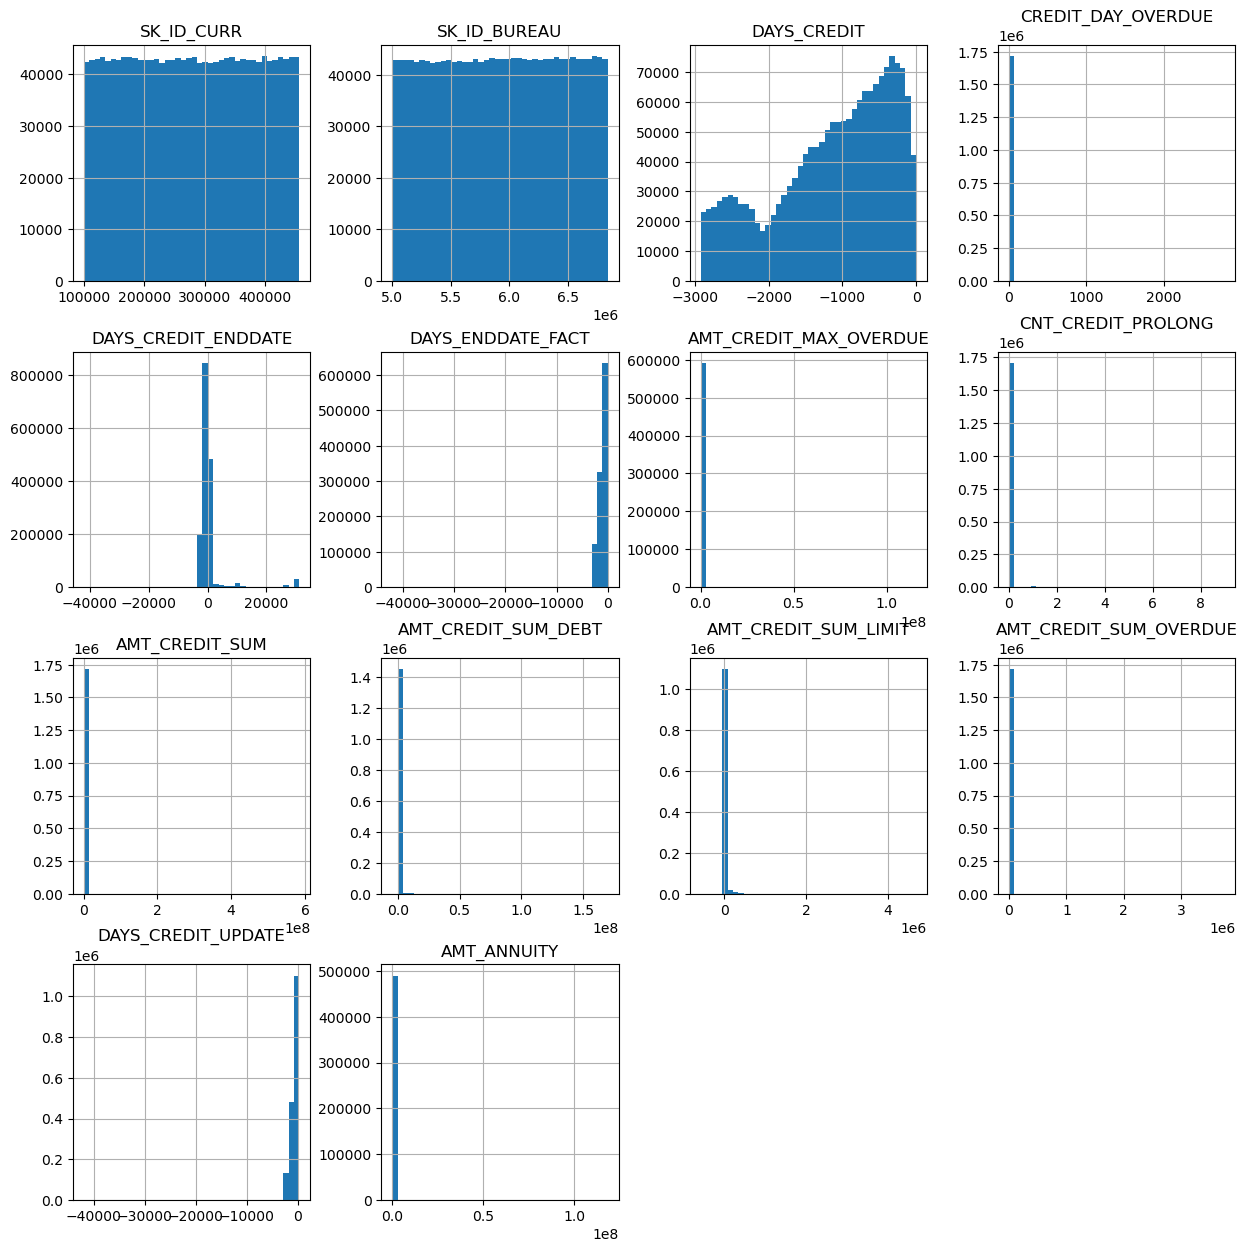

In [37]:
bureau.hist(figsize=(15,15), bins=40)

In [38]:
bureau.describe()

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
count,1.716428e+06,1.716428e+06,1.716428e+06,1.716428e+06,1.610875e+06,1.082775e+06,5.919400e+05,1.716428e+06,1.716415e+06,1.458759e+06,1.124648e+06,1.716428e+06,1.716428e+06,4.896370e+05
mean,2.782149e+05,5.924434e+06,-1.142108e+03,8.181666e-01,5.105174e+02,-1.017437e+03,3.825418e+03,6.410406e-03,3.549946e+05,1.370851e+05,6.229515e+03,3.791276e+01,-5.937483e+02,1.571276e+04
std,1.029386e+05,5.322657e+05,7.951649e+02,3.654443e+01,4.994220e+03,7.140106e+02,2.060316e+05,9.622391e-02,1.149811e+06,6.774011e+05,4.503203e+04,5.937650e+03,7.207473e+02,3.258269e+05
min,1.000010e+05,5.000000e+06,-2.922000e+03,0.000000e+00,-4.206000e+04,-4.202300e+04,0.000000e+00,0.000000e+00,0.000000e+00,-4.705600e+06,-5.864061e+05,0.000000e+00,-4.194700e+04,0.000000e+00
25%,1.888668e+05,5.463954e+06,-1.666000e+03,0.000000e+00,-1.138000e+03,-1.489000e+03,0.000000e+00,0.000000e+00,5.130000e+04,0.000000e+00,0.000000e+00,0.000000e+00,-9.080000e+02,0.000000e+00
50%,2.780550e+05,5.926304e+06,-9.870000e+02,0.000000e+00,-3.300000e+02,-8.970000e+02,0.000000e+00,0.000000e+00,1.255185e+05,0.000000e+00,0.000000e+00,0.000000e+00,-3.950000e+02,0.000000e+00
75%,3.674260e+05,6.385681e+06,-4.740000e+02,0.000000e+00,4.740000e+02,-4.250000e+02,0.000000e+00,0.000000e+00,3.150000e+05,4.015350e+04,0.000000e+00,0.000000e+00,-3.300000e+01,1.350000e+04
max,4.562550e+05,6.843457e+06,0.000000e+00,2.792000e+03,3.119900e+04,0.000000e+00,1.159872e+08,9.000000e+00,5.850000e+08,1.701000e+08,4.705600e+06,3.756681e+06,3.720000e+02,1.184534e+08


In [39]:
# Threshold for more than half nulls
threshold = len(bureau) / 2

# Find columns with more than half nulls
columns_with_many_nulls = bureau.columns[bureau.isnull().sum() > threshold]

print("Columns with more than half nulls:", columns_with_many_nulls.tolist())

Columns with more than half nulls: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_ANNUITY']


In [40]:
# Getting the correlated values
corr_matrix = bureau.corr().abs()
corr_matrix

/var/folders/6j/3l6q9l4515sdmfyg8znhblxr0000gn/T/ipykernel_49090/2544516796.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = bureau.corr().abs()


,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
SK_ID_CURR,1.000000,0.000135,0.000266,0.000283,0.000456,0.000648,0.001329,0.000388,0.001179,0.000790,0.000304,0.000014,0.000510,0.002727
SK_ID_BUREAU,0.000135,1.000000,0.013015,0.002628,0.009107,0.017890,0.002290,0.000740,0.007962,0.005732,0.003986,0.000499,0.019398,0.001799
DAYS_CREDIT,0.000266,0.013015,1.000000,0.027266,0.225682,0.875359,0.014724,0.030460,0.050883,0.135397,0.025140,0.000383,0.688771,0.005676
CREDIT_DAY_OVERDUE,0.000283,0.002628,0.027266,1.000000,0.007352,0.008637,0.001249,0.002756,0.003292,0.002355,0.000345,0.090951,0.018461,0.000339
DAYS_CREDIT_ENDDATE,0.000456,0.009107,0.225682,0.007352,1.000000,0.248825,0.000577,0.113683,0.055424,0.081298,0.095421,0.001077,0.248525,0.000475
DAYS_ENDDATE_FACT,0.000648,0.017890,0.875359,0.008637,0.248825,1.000000,0.000999,0.012017,0.059096,0.019609,0.019476,0.000332,0.751294,0.006274
AMT_CREDIT_MAX_OVERDUE,0.001329,0.002290,0.014724,0.001249,0.000577,0.000999,1.000000,0.001523,0.081663,0.014007,0.000112,0.015036,0.000749,0.001578
CNT_CREDIT_PROLONG,0.000388,0.000740,0.030460,0.002756,0.113683,0.012017,0.001523,1.000000,0.008345,0.001366,0.073805,0.000002,0.017864,0.000465
AMT_CREDIT_SUM,0.001179,0.007962,0.050883,0.003292,0.055424,0.059096,0.081663,0.008345,1.000000,0.683419,0.003756,0.006342,0.104629,0.049146
AMT_CREDIT_SUM_DEBT,0.000790,0.005732,0.135397,0.002355,0.081298,0.019609,0.014007,0.001366,0.683419,1.000000,0.018215,0.008046,0.141235,0.025507


In [41]:
# Getting the upper triangular matrix
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
upper_tri 


,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
SK_ID_CURR,NaN,0.000135,0.000266,0.000283,0.000456,0.000648,0.001329,0.000388,0.001179,0.000790,0.000304,0.000014,0.000510,0.002727
SK_ID_BUREAU,NaN,NaN,0.013015,0.002628,0.009107,0.017890,0.002290,0.000740,0.007962,0.005732,0.003986,0.000499,0.019398,0.001799
DAYS_CREDIT,NaN,NaN,NaN,0.027266,0.225682,0.875359,0.014724,0.030460,0.050883,0.135397,0.025140,0.000383,0.688771,0.005676
CREDIT_DAY_OVERDUE,NaN,NaN,NaN,NaN,0.007352,0.008637,0.001249,0.002756,0.003292,0.002355,0.000345,0.090951,0.018461,0.000339
DAYS_CREDIT_ENDDATE,NaN,NaN,NaN,NaN,NaN,0.248825,0.000577,0.113683,0.055424,0.081298,0.095421,0.001077,0.248525,0.000475
DAYS_ENDDATE_FACT,NaN,NaN,NaN,NaN,NaN,NaN,0.000999,0.012017,0.059096,0.019609,0.019476,0.000332,0.751294,0.006274
AMT_CREDIT_MAX_OVERDUE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001523,0.081663,0.014007,0.000112,0.015036,0.000749,0.001578
CNT_CREDIT_PROLONG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.008345,0.001366,0.073805,0.000002,0.017864,0.000465
AMT_CREDIT_SUM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.683419,0.003756,0.006342,0.104629,0.049146
AMT_CREDIT_SUM_DEBT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.018215,0.008046,0.141235,0.025507


In [42]:
# Checking columns that have a high correlated value of 0.9.
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
to_drop

[]

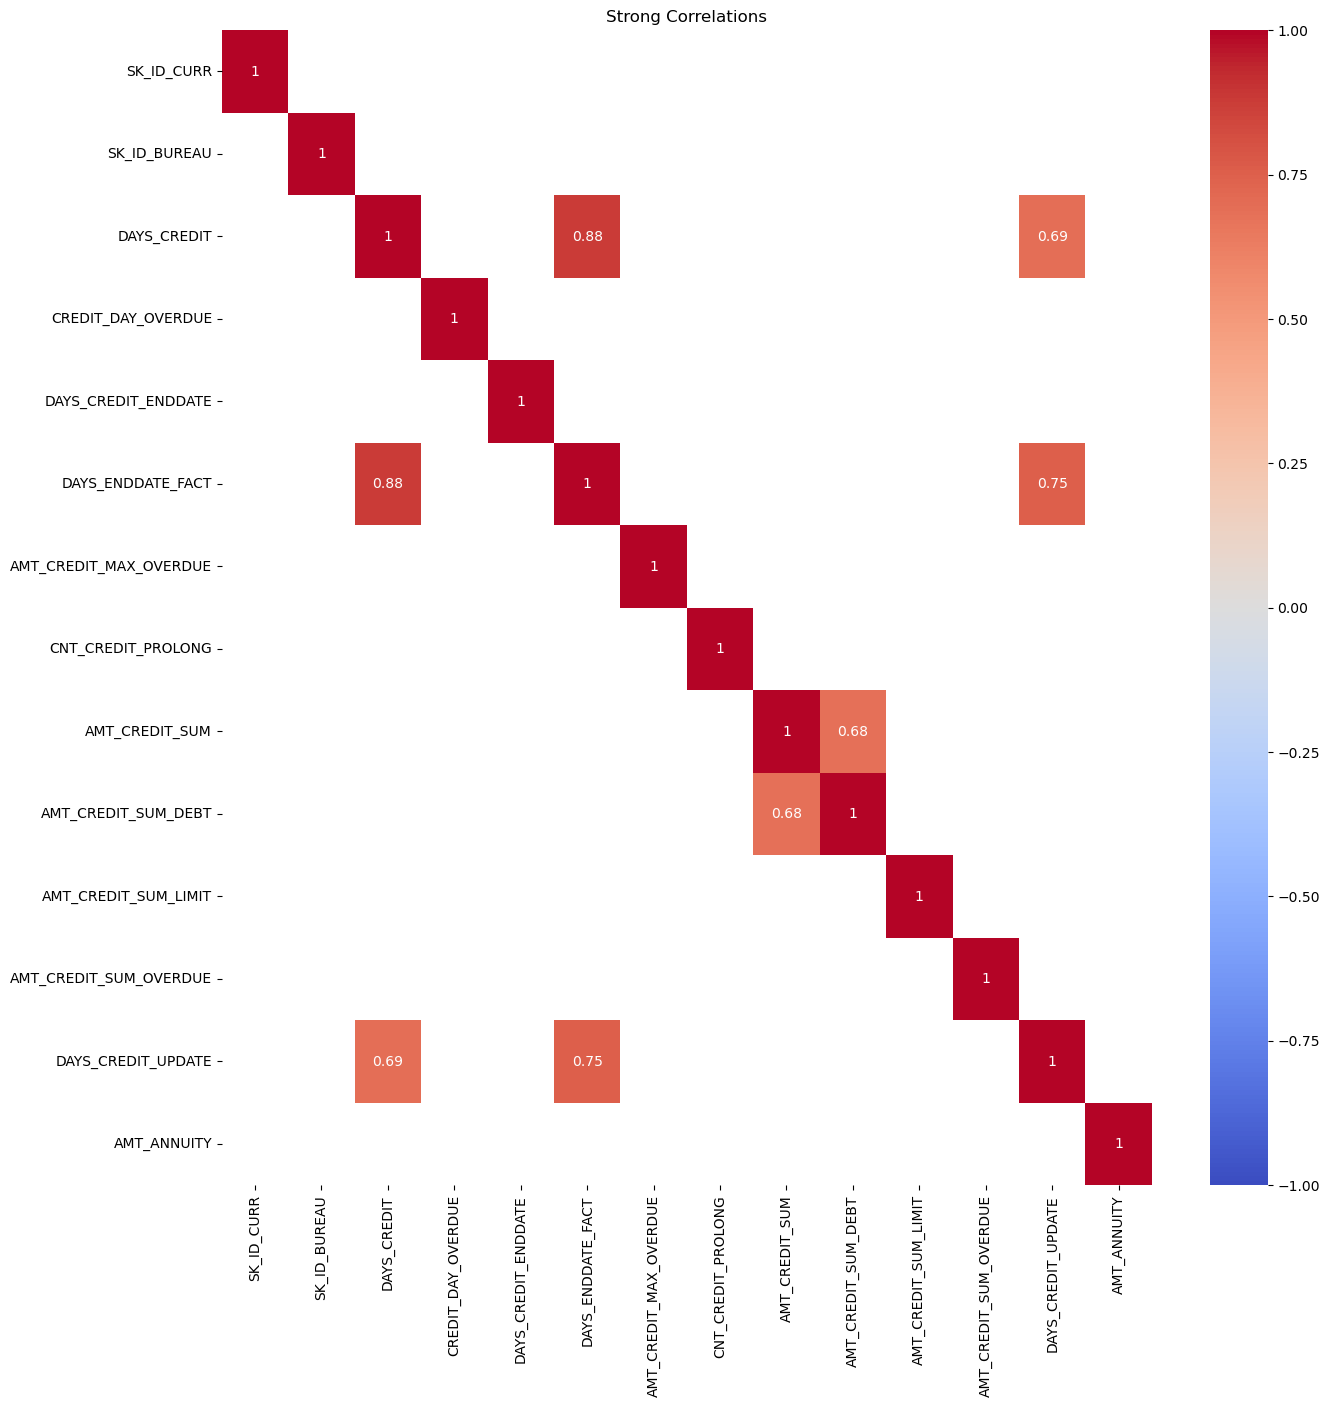

In [43]:
# Looking at just the numerical features to fully understand how these feature effect SalePrice
numerical_features = bureau.select_dtypes(include=['float64', 'int64'])
# Compute the correlation matrix
correlation_matrix = numerical_features.corr()
# Filter heatmap to show only correlations greater than 0.6
plt.figure(figsize=(15, 15))  # Adjust the figure size to make it more readable
strong_corr = correlation_matrix[(correlation_matrix > 0.6) | (correlation_matrix < -0.6)]
sns.heatmap(strong_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Strong Correlations')
plt.show()

In [44]:
# Set a threshold for strong correlations
threshold = 0.6

# Find strong correlations
strong_correlations = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            strong_correlations.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

# Print the results
for var1, var2, corr in strong_correlations:
    print(f"{var1}, {var2}, {corr}")

DAYS_ENDDATE_FACT, DAYS_CREDIT, 0.8753586827849493
AMT_CREDIT_SUM_DEBT, AMT_CREDIT_SUM, 0.6834194239139904
DAYS_CREDIT_UPDATE, DAYS_CREDIT, 0.6887713648241781
DAYS_CREDIT_UPDATE, DAYS_ENDDATE_FACT, 0.7512941486768753


The features that have been selected in this table have been: 'CREDIT_ACTIVE', 'DAYS_CREDIT', 'DAYS_CREDIT_ENDDATE', 'AMT_CREDIT_SUM', 'AMT_ANNUITY','DAYS_CREDIT_UPDATE', 'CREDIT_DAY_OVERDUE', 'CREDIT_TYPE'.

The highlighted correlated features that reflect the chosen features are: 'DAYS_CREDIT', 'AMT_CREDIT_SUM', 'DAYS_CREDIT_UPDATE'. Even though DAYS_ENDDATE_FACT and AMT_CREDIT_SUM_DEBT are high in correlation since they are paired with the other features that were selected then we neglect them since we would avoid multicollinearity. 

These other features are kept since it makes logically sense to keep them, 'CREDIT_ACTIVE', 'DAYS_CREDIT_ENDDATE', 'CREDIT_DAY_OVERDUE', 'CREDIT_TYPE'.

Features with high null count were excluded to which were: 'AMT_CREDIT_MAX_OVERDUE', 'AMT_ANNUITY'

In [45]:
bureau = bureau[['SK_ID_CURR','SK_ID_BUREAU', 'CREDIT_ACTIVE', 
                 'DAYS_CREDIT', 'DAYS_CREDIT_ENDDATE', 
                 'AMT_CREDIT_SUM',
                 'DAYS_CREDIT_UPDATE', 'CREDIT_DAY_OVERDUE',
                 'CREDIT_TYPE']]
bureau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 9 columns):
 #   Column               Dtype  
---  ------               -----  
 0   SK_ID_CURR           int64  
 1   SK_ID_BUREAU         int64  
 2   CREDIT_ACTIVE        object 
 3   DAYS_CREDIT          int64  
 4   DAYS_CREDIT_ENDDATE  float64
 5   AMT_CREDIT_SUM       float64
 6   DAYS_CREDIT_UPDATE   int64  
 7   CREDIT_DAY_OVERDUE   int64  
 8   CREDIT_TYPE          object 
dtypes: float64(2), int64(5), object(2)
memory usage: 117.9+ MB


In [46]:
# Feature Engineering:
bureau['DEFAULT_RATE'] = bureau['CREDIT_DAY_OVERDUE'] / (bureau['AMT_CREDIT_SUM'] + 1e-5)

In [47]:

# Selective aggregation for bureau data
bureau_agg = bureau.groupby('SK_ID_CURR').agg({
    'DAYS_CREDIT': ['mean', 'min', 'max'],
    'DAYS_CREDIT_ENDDATE': ['mean'],
    'AMT_CREDIT_SUM': ['mean', 'max'],
    'DAYS_CREDIT_UPDATE': ['mean', 'max'],
    'CREDIT_DAY_OVERDUE': ['mean', 'max'],
    'CREDIT_TYPE': ['count'],
    'DEFAULT_RATE': 'mean'
}).reset_index()



# Flatten multi-level column index if it exists (as in this case with multiple aggregations)
bureau_agg.columns = ['_'.join(col).strip('_') for col in bureau_agg.columns.values]

In [48]:
print(bureau_agg.skew())

SK_ID_CURR                    0.001209
DAYS_CREDIT_mean             -0.506055
DAYS_CREDIT_min               0.301368
DAYS_CREDIT_max              -2.140808
DAYS_CREDIT_ENDDATE_mean      4.897402
AMT_CREDIT_SUM_mean          63.087906
AMT_CREDIT_SUM_max           77.707288
DAYS_CREDIT_UPDATE_mean      -4.953672
DAYS_CREDIT_UPDATE_max       -9.423689
CREDIT_DAY_OVERDUE_mean      54.930503
CREDIT_DAY_OVERDUE_max       23.942911
CREDIT_TYPE_count             1.838618
DEFAULT_RATE_mean           156.769576
dtype: float64


In [49]:
df_head3 = bureau_agg.head()
# Displaying a table in Markdown format to put in .md file
df_head3_md = df_head3.to_markdown(index=False)
Markdown(df_head3_md)

|   SK_ID_CURR |   DAYS_CREDIT_mean |   DAYS_CREDIT_min |   DAYS_CREDIT_max |   DAYS_CREDIT_ENDDATE_mean |   AMT_CREDIT_SUM_mean |   AMT_CREDIT_SUM_max |   DAYS_CREDIT_UPDATE_mean |   DAYS_CREDIT_UPDATE_max |   CREDIT_DAY_OVERDUE_mean |   CREDIT_DAY_OVERDUE_max |   CREDIT_TYPE_count |   DEFAULT_RATE_mean |
|-------------:|-------------------:|------------------:|------------------:|---------------------------:|----------------------:|---------------------:|--------------------------:|-------------------------:|--------------------------:|-------------------------:|--------------------:|--------------------:|
|       100001 |           -735     |             -1572 |               -49 |                    82.4286 |              207624   |             378000   |                  -93.1429 |                       -6 |                         0 |                        0 |                   7 |                   0 |
|       100002 |           -874     |             -1437 |              -103 |                  -349      |              108132   |             450000   |                 -499.875  |                       -7 |                         0 |                        0 |                   8 |                   0 |
|       100003 |          -1400.75  |             -2586 |              -606 |                  -544.5    |              254350   |             810000   |                 -816      |                      -43 |                         0 |                        0 |                   4 |                   0 |
|       100004 |           -867     |             -1326 |              -408 |                  -488.5    |               94518.9 |              94537.8 |                 -532      |                     -382 |                         0 |                        0 |                   2 |                   0 |
|       100005 |           -190.667 |              -373 |               -62 |                   439.333  |              219042   |             568800   |                  -54.3333 |                      -11 |                         0 |                        0 |                   3 |                   0 |

In [50]:
display(Markdown("### INFO"))
display(bureau_agg.info())
display(Markdown("### Description"))
display(bureau_agg.describe())

### INFO

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305811 entries, 0 to 305810
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SK_ID_CURR                305811 non-null  int64  
 1   DAYS_CREDIT_mean          305811 non-null  float64
 2   DAYS_CREDIT_min           305811 non-null  int64  
 3   DAYS_CREDIT_max           305811 non-null  int64  
 4   DAYS_CREDIT_ENDDATE_mean  303226 non-null  float64
 5   AMT_CREDIT_SUM_mean       305809 non-null  float64
 6   AMT_CREDIT_SUM_max        305809 non-null  float64
 7   DAYS_CREDIT_UPDATE_mean   305811 non-null  float64
 8   DAYS_CREDIT_UPDATE_max    305811 non-null  int64  
 9   CREDIT_DAY_OVERDUE_mean   305811 non-null  float64
 10  CREDIT_DAY_OVERDUE_max    305811 non-null  int64  
 11  CREDIT_TYPE_count         305811 non-null  int64  
 12  DEFAULT_RATE_mean         305809 non-null  float64
dtypes: float64(7), int64(6)
memory usage: 30.3 M

None

### Description

,SK_ID_CURR,DAYS_CREDIT_mean,DAYS_CREDIT_min,DAYS_CREDIT_max,DAYS_CREDIT_ENDDATE_mean,AMT_CREDIT_SUM_mean,AMT_CREDIT_SUM_max,DAYS_CREDIT_UPDATE_mean,DAYS_CREDIT_UPDATE_max,CREDIT_DAY_OVERDUE_mean,CREDIT_DAY_OVERDUE_max,CREDIT_TYPE_count,DEFAULT_RATE_mean
count,305811.000000,305811.000000,305811.000000,305811.000000,303226.000000,3.058090e+05,3.058090e+05,305811.000000,305811.000000,305811.000000,305811.000000,305811.000000,3.058090e+05
mean,278047.300091,-1083.802103,-1764.362845,-490.942608,662.420814,3.807398e+05,9.917572e+05,-542.965748,-139.313717,0.965926,4.436629,5.612709,2.771968e+03
std,102849.568343,558.441124,859.260807,533.529324,3282.359178,8.792865e+05,2.317442e+06,446.427113,344.793947,24.957209,85.573591,4.430354,2.850354e+05
min,100001.000000,-2922.000000,-2922.000000,-2922.000000,-41875.000000,0.000000e+00,0.000000e+00,-41890.000000,-41890.000000,0.000000,0.000000,1.000000,0.000000e+00
25%,188878.500000,-1431.000000,-2583.000000,-623.000000,-697.525000,1.039616e+05,1.800000e+05,-773.696154,-49.000000,0.000000,0.000000,2.000000,0.000000e+00
50%,277895.000000,-1052.500000,-1822.000000,-305.000000,-131.788889,1.972972e+05,4.500000e+05,-479.300000,-18.000000,0.000000,0.000000,4.000000,0.000000e+00
75%,367184.500000,-670.369318,-1045.000000,-149.000000,613.000000,3.978647e+05,1.079100e+06,-209.000000,-9.000000,0.000000,0.000000,8.000000,0.000000e+00
max,456255.000000,0.000000,0.000000,0.000000,31198.000000,1.980723e+08,5.850000e+08,14.000000,372.000000,2776.000000,2792.000000,116.000000,7.280000e+07


# Credit Card Balance

In [51]:
credit_card_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_CURRENT    float64
 19  CNT_INSTALMENT_MATURE

array([[<Axes: title={'center': 'SK_ID_PREV'}>,
        <Axes: title={'center': 'SK_ID_CURR'}>,
        <Axes: title={'center': 'MONTHS_BALANCE'}>,
        <Axes: title={'center': 'AMT_BALANCE'}>,
        <Axes: title={'center': 'AMT_CREDIT_LIMIT_ACTUAL'}>],
       [<Axes: title={'center': 'AMT_DRAWINGS_ATM_CURRENT'}>,
        <Axes: title={'center': 'AMT_DRAWINGS_CURRENT'}>,
        <Axes: title={'center': 'AMT_DRAWINGS_OTHER_CURRENT'}>,
        <Axes: title={'center': 'AMT_DRAWINGS_POS_CURRENT'}>,
        <Axes: title={'center': 'AMT_INST_MIN_REGULARITY'}>],
       [<Axes: title={'center': 'AMT_PAYMENT_CURRENT'}>,
        <Axes: title={'center': 'AMT_PAYMENT_TOTAL_CURRENT'}>,
        <Axes: title={'center': 'AMT_RECEIVABLE_PRINCIPAL'}>,
        <Axes: title={'center': 'AMT_RECIVABLE'}>,
        <Axes: title={'center': 'AMT_TOTAL_RECEIVABLE'}>],
       [<Axes: title={'center': 'CNT_DRAWINGS_ATM_CURRENT'}>,
        <Axes: title={'center': 'CNT_DRAWINGS_CURRENT'}>,
        <Axes: title=

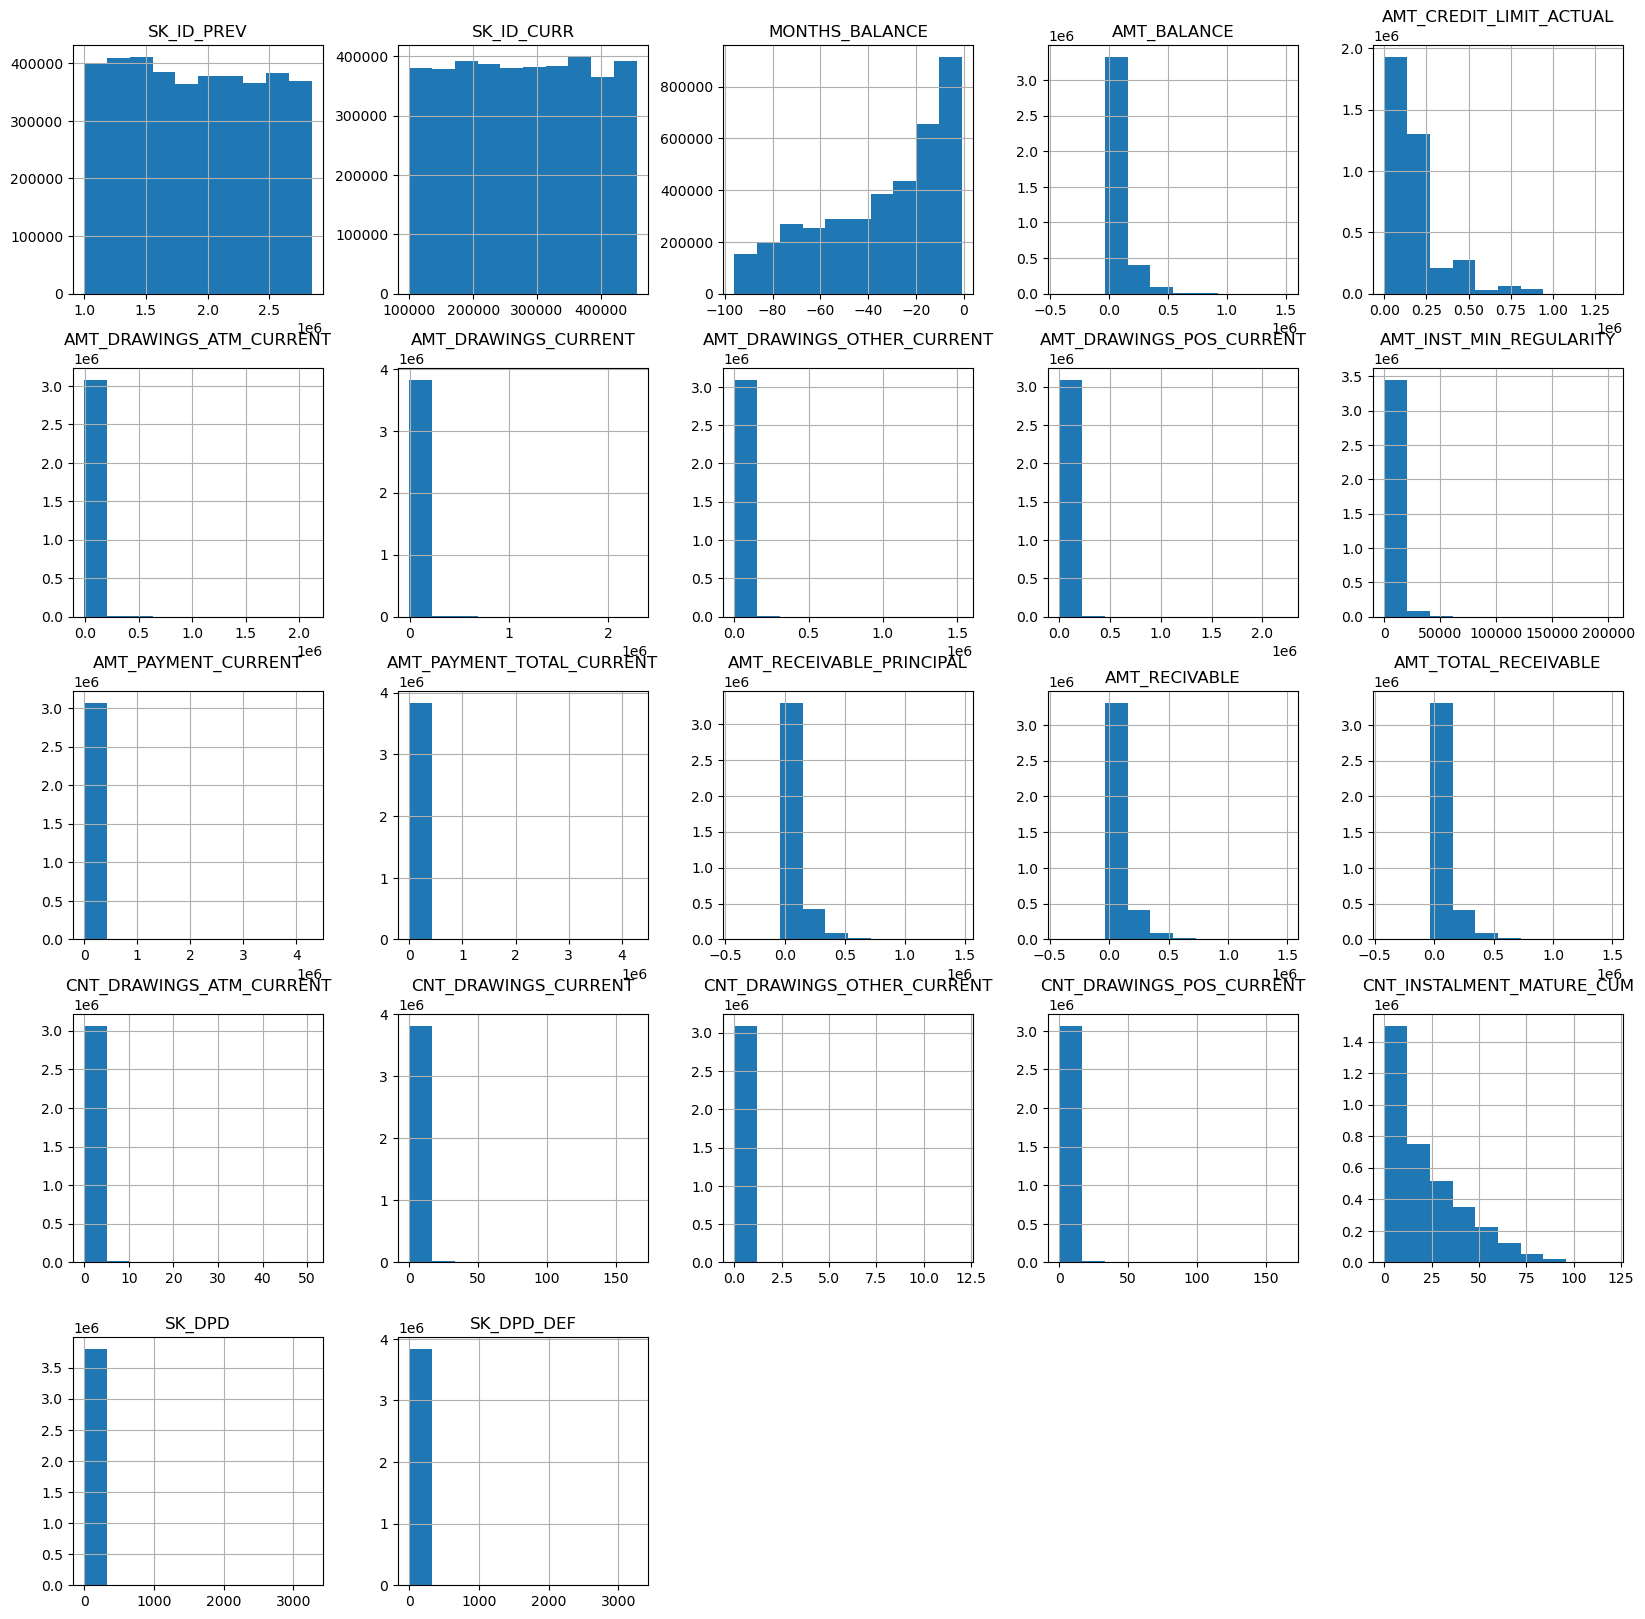

In [52]:
credit_card_balance.hist(figsize=(20,20))

In [53]:
# Threshold for more than half nulls
threshold = len(credit_card_balance) / 2

# Find columns with more than half nulls
columns_with_many_nulls = credit_card_balance.columns[credit_card_balance.isnull().sum() > threshold]

print("Columns with more than half nulls:", columns_with_many_nulls.tolist())

Columns with more than half nulls: []


In [54]:
# Getting the correlated values
corr_matrix = credit_card_balance.corr().abs()
corr_matrix

/var/folders/6j/3l6q9l4515sdmfyg8znhblxr0000gn/T/ipykernel_49090/19934114.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = credit_card_balance.corr().abs()


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF
SK_ID_PREV,1.000000,0.004723,0.003670,0.005046,0.006631,0.004342,0.002624,0.000160,0.001721,0.006460,...,0.005140,0.005035,0.005032,0.002821,0.000367,0.001412,0.000809,0.007219,0.001786,0.001973
SK_ID_CURR,0.004723,1.000000,0.001696,0.003510,0.005991,0.000814,0.000708,0.000958,0.000786,0.003300,...,0.003589,0.003518,0.003524,0.002082,0.002654,0.000131,0.002135,0.000581,0.000962,0.001519
MONTHS_BALANCE,0.003670,0.001696,1.000000,0.014558,0.199900,0.036802,0.065527,0.000405,0.118146,0.087529,...,0.016266,0.013172,0.013084,0.002536,0.113321,0.026192,0.160207,0.008620,0.039434,0.001659
AMT_BALANCE,0.005046,0.003510,0.014558,1.000000,0.489386,0.283551,0.336965,0.065366,0.169449,0.896728,...,0.999720,0.999917,0.999897,0.309968,0.259184,0.046563,0.155553,0.005009,0.046988,0.013009
AMT_CREDIT_LIMIT_ACTUAL,0.006631,0.005991,0.199900,0.489386,1.000000,0.247219,0.263093,0.050579,0.234976,0.467620,...,0.490445,0.488641,0.488598,0.221808,0.204237,0.030051,0.202868,0.157269,0.038791,0.002236
AMT_DRAWINGS_ATM_CURRENT,0.004342,0.000814,0.036802,0.283551,0.247219,1.000000,0.800190,0.017899,0.078971,0.094824,...,0.280402,0.278290,0.278260,0.732907,0.298173,0.013254,0.076083,0.103721,0.022044,0.003360
AMT_DRAWINGS_CURRENT,0.002624,0.000708,0.065527,0.336965,0.263093,0.800190,1.000000,0.236297,0.615591,0.124469,...,0.337117,0.332831,0.332796,0.594361,0.523016,0.140032,0.359001,0.093491,0.020606,0.003137
AMT_DRAWINGS_OTHER_CURRENT,0.000160,0.000958,0.000405,0.065366,0.050579,0.017899,0.236297,1.000000,0.007382,0.002158,...,0.066108,0.064929,0.064923,0.012008,0.021271,0.575295,0.004458,0.023013,0.003693,0.000568
AMT_DRAWINGS_POS_CURRENT,0.001721,0.000786,0.118146,0.169449,0.234976,0.078971,0.615591,0.007382,1.000000,0.063562,...,0.173745,0.168974,0.168950,0.072658,0.520123,0.007620,0.542556,0.106813,0.015040,0.002384
AMT_INST_MIN_REGULARITY,0.006460,0.003300,0.087529,0.896728,0.467620,0.094824,0.124469,0.002158,0.063562,1.000000,...,0.896030,0.897617,0.897587,0.170616,0.148262,0.014360,0.086729,0.064320,0.061484,0.005715


In [55]:
# Getting the upper triangular matrix
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
upper_tri 

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF
SK_ID_PREV,NaN,0.004723,0.003670,0.005046,0.006631,0.004342,0.002624,0.000160,0.001721,0.006460,...,0.005140,0.005035,0.005032,0.002821,0.000367,0.001412,0.000809,0.007219,0.001786,0.001973
SK_ID_CURR,NaN,NaN,0.001696,0.003510,0.005991,0.000814,0.000708,0.000958,0.000786,0.003300,...,0.003589,0.003518,0.003524,0.002082,0.002654,0.000131,0.002135,0.000581,0.000962,0.001519
MONTHS_BALANCE,NaN,NaN,NaN,0.014558,0.199900,0.036802,0.065527,0.000405,0.118146,0.087529,...,0.016266,0.013172,0.013084,0.002536,0.113321,0.026192,0.160207,0.008620,0.039434,0.001659
AMT_BALANCE,NaN,NaN,NaN,NaN,0.489386,0.283551,0.336965,0.065366,0.169449,0.896728,...,0.999720,0.999917,0.999897,0.309968,0.259184,0.046563,0.155553,0.005009,0.046988,0.013009
AMT_CREDIT_LIMIT_ACTUAL,NaN,NaN,NaN,NaN,NaN,0.247219,0.263093,0.050579,0.234976,0.467620,...,0.490445,0.488641,0.488598,0.221808,0.204237,0.030051,0.202868,0.157269,0.038791,0.002236
AMT_DRAWINGS_ATM_CURRENT,NaN,NaN,NaN,NaN,NaN,NaN,0.800190,0.017899,0.078971,0.094824,...,0.280402,0.278290,0.278260,0.732907,0.298173,0.013254,0.076083,0.103721,0.022044,0.003360
AMT_DRAWINGS_CURRENT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.236297,0.615591,0.124469,...,0.337117,0.332831,0.332796,0.594361,0.523016,0.140032,0.359001,0.093491,0.020606,0.003137
AMT_DRAWINGS_OTHER_CURRENT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.007382,0.002158,...,0.066108,0.064929,0.064923,0.012008,0.021271,0.575295,0.004458,0.023013,0.003693,0.000568
AMT_DRAWINGS_POS_CURRENT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.063562,...,0.173745,0.168974,0.168950,0.072658,0.520123,0.007620,0.542556,0.106813,0.015040,0.002384
AMT_INST_MIN_REGULARITY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.896030,0.897617,0.897587,0.170616,0.148262,0.014360,0.086729,0.064320,0.061484,0.005715


In [56]:
# Checking columns that have a high correlated value of 0.9.
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
to_drop

['AMT_PAYMENT_TOTAL_CURRENT',
 'AMT_RECEIVABLE_PRINCIPAL',
 'AMT_RECIVABLE',
 'AMT_TOTAL_RECEIVABLE',
 'CNT_DRAWINGS_POS_CURRENT']

In [57]:
credit_card_balance.drop(columns=to_drop, inplace=True)

In [58]:
credit_card_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 18 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  CNT_DRAWINGS_ATM_CURRENT    float64
 12  CNT_DRAWINGS_CURRENT        int64  
 13  CNT_DRAWINGS_OTHER_CURRENT  float64
 14  CNT_INSTALMENT_MATURE_CUM   float64
 15  NAME_CONTRACT_STATUS        object 
 16  SK_DPD                      int64  
 17  SK_DPD_DEF                  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 527.4+ MB


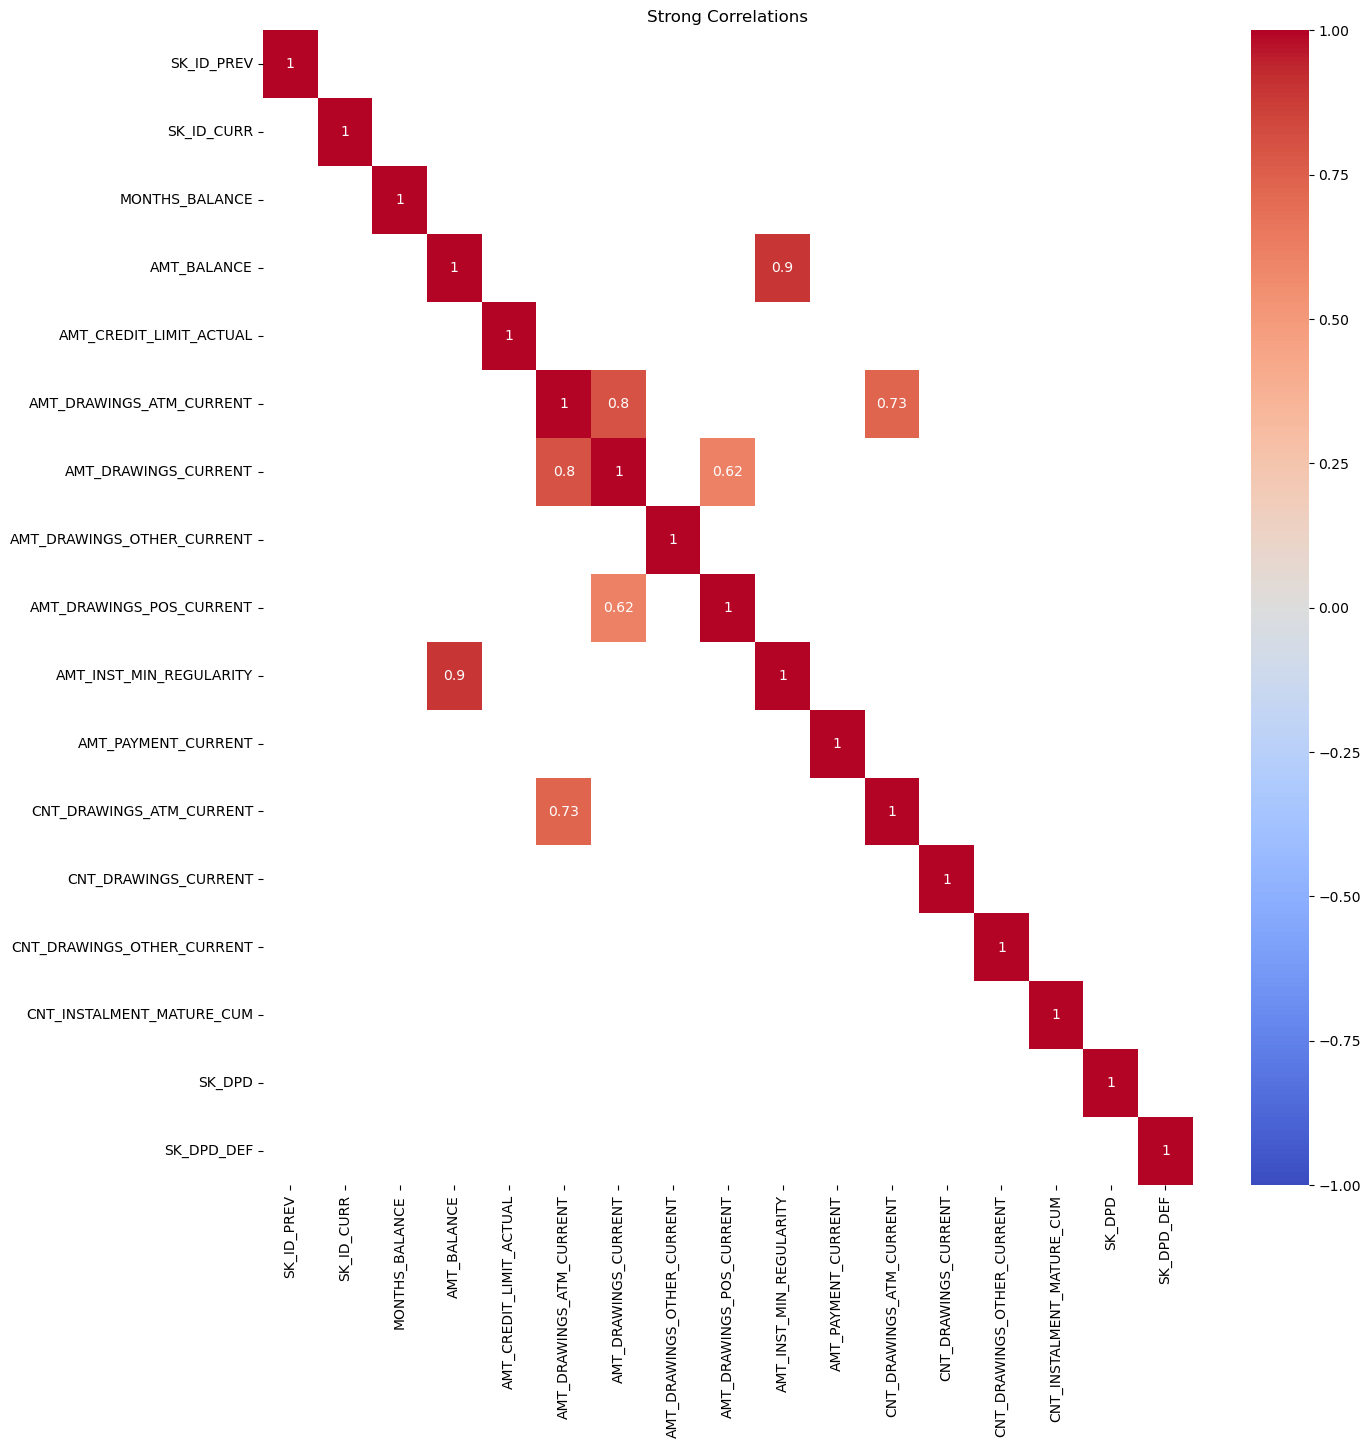

In [59]:
# Looking at just the numerical features to fully understand how these feature effect SalePrice
numerical_features = credit_card_balance.select_dtypes(include=['float64', 'int64'])
# Compute the correlation matrix
correlation_matrix = numerical_features.corr()
# Filter heatmap to show only correlations greater than 0.6
plt.figure(figsize=(15, 15))  # Adjust the figure size to make it more readable
strong_corr = correlation_matrix[(correlation_matrix > 0.6) | (correlation_matrix < -0.6)]
sns.heatmap(strong_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Strong Correlations')
plt.show()

In [60]:
# Set a threshold for strong correlations
threshold = 0.6

# Find strong correlations
strong_correlations = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            strong_correlations.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

# Print the results
for var1, var2, corr in strong_correlations:
    print(f"{var1}, {var2}, {corr}")

AMT_DRAWINGS_CURRENT, AMT_DRAWINGS_ATM_CURRENT, 0.8001899283858441
AMT_DRAWINGS_POS_CURRENT, AMT_DRAWINGS_CURRENT, 0.615591479751731
AMT_INST_MIN_REGULARITY, AMT_BALANCE, 0.8967275595364261
CNT_DRAWINGS_ATM_CURRENT, AMT_DRAWINGS_ATM_CURRENT, 0.7329074611202059


In [61]:
credit_card_balance = credit_card_balance[['SK_ID_CURR', 'AMT_BALANCE', 'AMT_PAYMENT_CURRENT',
                                           'CNT_DRAWINGS_ATM_CURRENT', 'NAME_CONTRACT_STATUS', 'SK_DPD',
                                           'AMT_INST_MIN_REGULARITY', 'SK_DPD_DEF']]
credit_card_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 8 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   SK_ID_CURR                int64  
 1   AMT_BALANCE               float64
 2   AMT_PAYMENT_CURRENT       float64
 3   CNT_DRAWINGS_ATM_CURRENT  float64
 4   NAME_CONTRACT_STATUS      object 
 5   SK_DPD                    int64  
 6   AMT_INST_MIN_REGULARITY   float64
 7   SK_DPD_DEF                int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 234.4+ MB


Some of these features that are listed were decided to be dropped because of the high correlation threshold being 0.9 to avoid multiculinearility, which are 'AMT_PAYMENT_TOTAL_CURRENT', 'AMT_RECEIVABLE_PRINCIPAL',
'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE', 'CNT_DRAWINGS_POS_CURRENT'.

The features that were kept were:'SK_ID_CURR', 'AMT_BALANCE', 'AMT_PAYMENT_CURRENT','CNT_DRAWINGS_ATM_CURRENT', 'NAME_CONTRACT_STATUS', 'SK_DPD','AMT_INST_MIN_REGULARITY', 'SK_DPD_DEF'. These selected fatures made logical sense to keep since they have information about the users credit. 

credit_card_agg = creidt_card_balance.groupby('SK_ID_CURR').agg({
    
    'CNT_DRAWINGS_ATM_CURRENT': ['mean', 'max'],           
    
    'AMT_BALANCE': ['mean', 'max'],                   
    
    'AMT_PAYMENT_CURRENT': ['mean', 'sum'],             
    
    'SK_DPD': ['mean', 'max'],
    
    'AMT_INST_MIN_REGULARITY': ['mean', 'min', 'max'],
    
    'SK_DPD_DEF': ['mean', 'max']                    

}).reset_index()

These chosen metrics 'mean' and 'max' shows the trends of how much a user spends and how its related to if the client is able to pay off there payments. Here we are predicting if the client is not paying there loan then we only care about the mean and max of these feature since the min value doesn't really affect the credit default risk. This as well was worse when I changed them all to 'mean' and 'max' so it's best to keep them as they are here. -- ?

In [62]:
df_head4 = credit_card_balance.head()
# Displaying a table in Markdown format to put in .md file
df_head4_md = df_head4.to_markdown(index=False)
Markdown(df_head4_md)

|   SK_ID_CURR |   AMT_BALANCE |   AMT_PAYMENT_CURRENT |   CNT_DRAWINGS_ATM_CURRENT | NAME_CONTRACT_STATUS   |   SK_DPD |   AMT_INST_MIN_REGULARITY |   SK_DPD_DEF |
|-------------:|--------------:|----------------------:|---------------------------:|:-----------------------|---------:|--------------------------:|-------------:|
|       378907 |         56.97 |                  1800 |                          0 | Active                 |        0 |                   1700.33 |            0 |
|       363914 |      63975.6  |                  2250 |                          1 | Active                 |        0 |                   2250    |            0 |
|       371185 |      31815.2  |                  2250 |                          0 | Active                 |        0 |                   2250    |            0 |
|       337855 |     236572    |                 11925 |                          1 | Active                 |        0 |                  11795.8  |            0 |
|       126868 |     453919    |                 27000 |                          0 | Active                 |        0 |                  22924.9  |            0 |

In [63]:
display(Markdown("### INFO"))
display(credit_card_balance.info())
display(Markdown("### Description"))
display(credit_card_balance.describe())

### INFO

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 8 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   SK_ID_CURR                int64  
 1   AMT_BALANCE               float64
 2   AMT_PAYMENT_CURRENT       float64
 3   CNT_DRAWINGS_ATM_CURRENT  float64
 4   NAME_CONTRACT_STATUS      object 
 5   SK_DPD                    int64  
 6   AMT_INST_MIN_REGULARITY   float64
 7   SK_DPD_DEF                int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 234.4+ MB


None

### Description

,SK_ID_CURR,AMT_BALANCE,AMT_PAYMENT_CURRENT,CNT_DRAWINGS_ATM_CURRENT,SK_DPD,AMT_INST_MIN_REGULARITY,SK_DPD_DEF
count,3.840312e+06,3.840312e+06,3.072324e+06,3.090496e+06,3.840312e+06,3.535076e+06,3.840312e+06
mean,2.783242e+05,5.830016e+04,1.028054e+04,3.094490e-01,9.283667e+00,3.540204e+03,3.316220e-01
std,1.027045e+05,1.063070e+05,3.607808e+04,1.100401e+00,9.751570e+01,5.600154e+03,2.147923e+01
min,1.000060e+05,-4.202502e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.895170e+05,0.000000e+00,1.523700e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.783960e+05,0.000000e+00,2.702700e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,3.675800e+05,8.904669e+04,9.000000e+03,0.000000e+00,0.000000e+00,6.633911e+03,0.000000e+00
max,4.562500e+05,1.505902e+06,4.289207e+06,5.100000e+01,3.260000e+03,2.028820e+05,3.260000e+03


# Previous_applications

In [64]:
previous_application.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

array([[<Axes: title={'center': 'SK_ID_PREV'}>,
        <Axes: title={'center': 'SK_ID_CURR'}>,
        <Axes: title={'center': 'AMT_ANNUITY'}>,
        <Axes: title={'center': 'AMT_APPLICATION'}>,
        <Axes: title={'center': 'AMT_CREDIT'}>],
       [<Axes: title={'center': 'AMT_DOWN_PAYMENT'}>,
        <Axes: title={'center': 'AMT_GOODS_PRICE'}>,
        <Axes: title={'center': 'HOUR_APPR_PROCESS_START'}>,
        <Axes: title={'center': 'NFLAG_LAST_APPL_IN_DAY'}>,
        <Axes: title={'center': 'RATE_DOWN_PAYMENT'}>],
       [<Axes: title={'center': 'RATE_INTEREST_PRIMARY'}>,
        <Axes: title={'center': 'RATE_INTEREST_PRIVILEGED'}>,
        <Axes: title={'center': 'DAYS_DECISION'}>,
        <Axes: title={'center': 'SELLERPLACE_AREA'}>,
        <Axes: title={'center': 'CNT_PAYMENT'}>],
       [<Axes: title={'center': 'DAYS_FIRST_DRAWING'}>,
        <Axes: title={'center': 'DAYS_FIRST_DUE'}>,
        <Axes: title={'center': 'DAYS_LAST_DUE_1ST_VERSION'}>,
        <Axes: title={

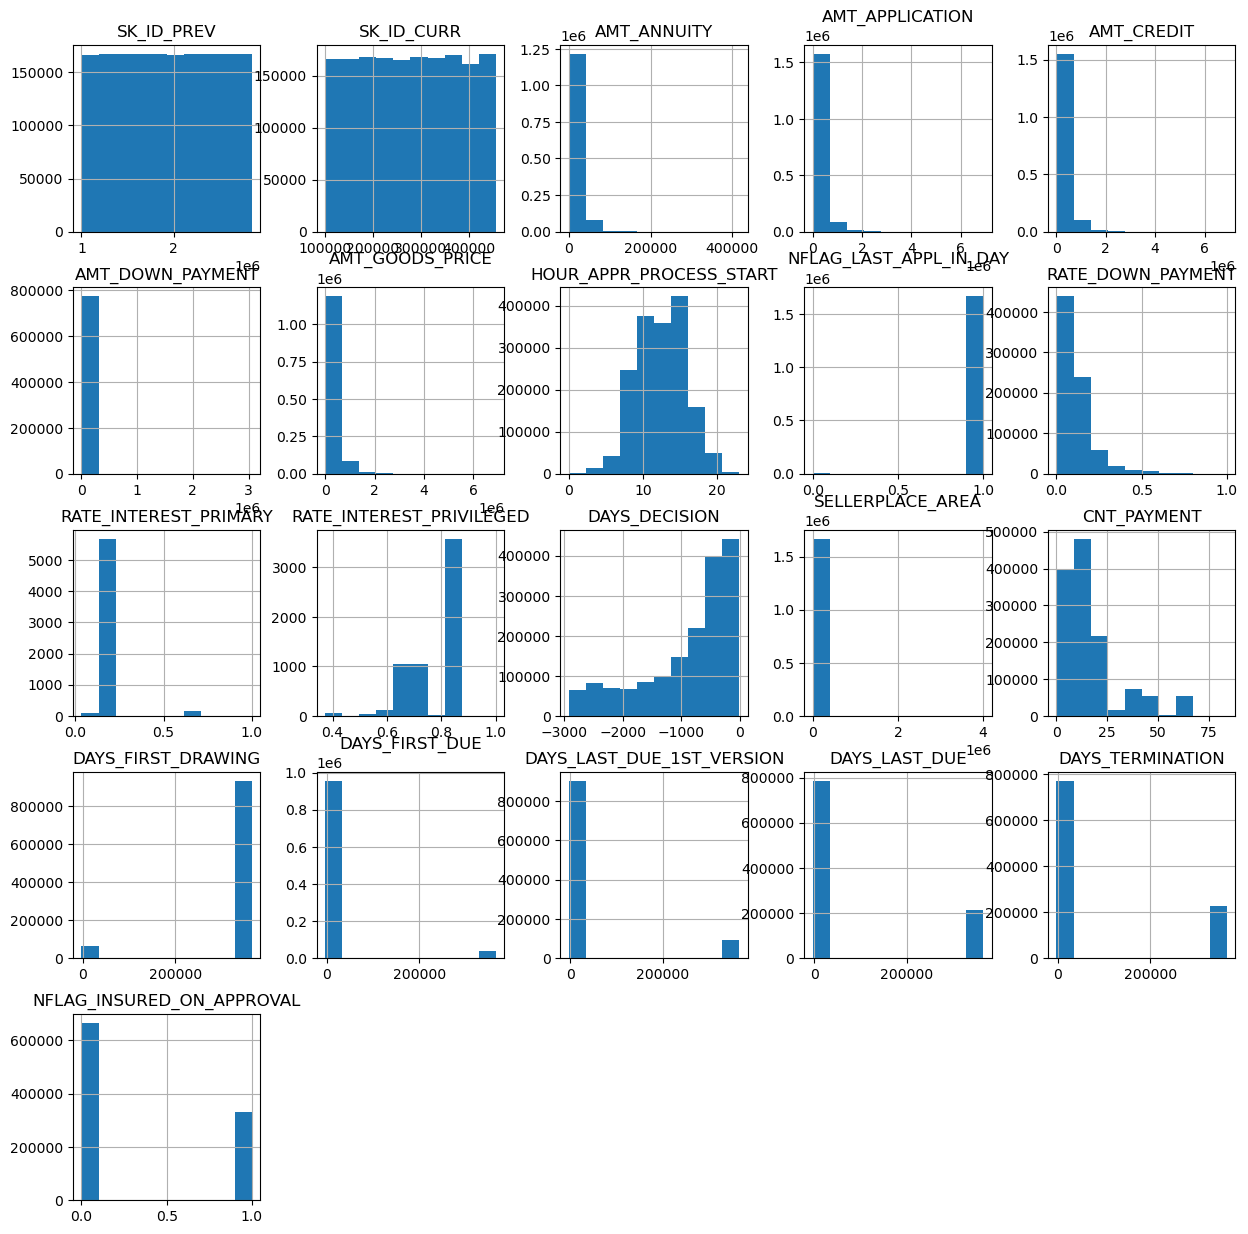

In [65]:
previous_application.hist(figsize=(15,15))

In [66]:
# Threshold for more than half nulls
threshold = len(previous_application) / 2

# Find columns with more than half nulls
columns_with_many_nulls = previous_application.columns[previous_application.isnull().sum() > threshold]

print("Columns with more than half nulls:", columns_with_many_nulls.tolist())

Columns with more than half nulls: ['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED']


In [67]:
# Getting the correlated values
corr_matrix = previous_application.corr().abs()
corr_matrix 

/var/folders/6j/3l6q9l4515sdmfyg8znhblxr0000gn/T/ipykernel_49090/205461455.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = previous_application.corr().abs()


,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
SK_ID_PREV,1.000000,0.000321,0.011459,0.003302,0.003659,0.001313,0.015293,0.002652,0.002828,0.004051,...,0.022312,0.019100,0.001079,0.015589,0.001478,0.000071,0.001222,0.001915,0.001781,0.003986
SK_ID_CURR,0.000321,1.000000,0.000577,0.000280,0.000195,0.000063,0.000369,0.002842,0.000098,0.001158,...,0.016757,0.000637,0.001265,0.000031,0.001329,0.000757,0.000252,0.000318,0.000020,0.000876
AMT_ANNUITY,0.011459,0.000577,1.000000,0.808872,0.816429,0.267694,0.820895,0.036201,0.020639,0.103878,...,0.202335,0.279051,0.015027,0.394535,0.052839,0.053295,0.068877,0.082659,0.068022,0.283080
AMT_APPLICATION,0.003302,0.000280,0.808872,1.000000,0.975824,0.482776,0.999884,0.014415,0.004310,0.072479,...,0.199733,0.133660,0.007649,0.680630,0.074544,0.049532,0.084905,0.172627,0.148618,0.259219
AMT_CREDIT,0.003659,0.000195,0.816429,0.975824,1.000000,0.301284,0.993087,0.021039,0.025179,0.188128,...,0.205158,0.133763,0.009567,0.674278,0.036813,0.002881,0.044031,0.224829,0.214320,0.263932
AMT_DOWN_PAYMENT,0.001313,0.000063,0.267694,0.482776,0.301284,1.000000,0.482776,0.016776,0.001597,0.473935,...,0.115343,0.024536,0.003533,0.031659,0.001773,0.013586,0.000869,0.031425,0.030702,0.042585
AMT_GOODS_PRICE,0.015293,0.000369,0.820895,0.999884,0.993087,0.482776,1.000000,0.045267,0.017100,0.072479,...,0.199733,0.290422,0.015842,0.672129,0.024445,0.021062,0.016883,0.211696,0.209296,0.243400
HOUR_APPR_PROCESS_START,0.002652,0.002842,0.036201,0.014415,0.021039,0.016776,0.045267,1.000000,0.005789,0.025930,...,0.045720,0.039962,0.015671,0.055511,0.014321,0.002797,0.016567,0.018018,0.018254,0.117318
NFLAG_LAST_APPL_IN_DAY,0.002828,0.000098,0.020639,0.004310,0.025179,0.001597,0.017100,0.005789,1.000000,0.004554,...,0.024640,0.016555,0.000912,0.063347,0.000409,0.002288,0.001981,0.002277,0.000744,0.007124
RATE_DOWN_PAYMENT,0.004051,0.001158,0.103878,0.072479,0.188128,0.473935,0.072479,0.025930,0.004554,1.000000,...,0.106143,0.208742,0.006489,0.278875,0.007969,0.039178,0.010934,0.147562,0.145461,0.021633


In [68]:
# Getting the upper triangular matrix
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
upper_tri

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
SK_ID_PREV,NaN,0.000321,0.011459,0.003302,0.003659,0.001313,0.015293,0.002652,0.002828,0.004051,...,0.022312,0.019100,0.001079,0.015589,0.001478,0.000071,0.001222,0.001915,0.001781,0.003986
SK_ID_CURR,NaN,NaN,0.000577,0.000280,0.000195,0.000063,0.000369,0.002842,0.000098,0.001158,...,0.016757,0.000637,0.001265,0.000031,0.001329,0.000757,0.000252,0.000318,0.000020,0.000876
AMT_ANNUITY,NaN,NaN,NaN,0.808872,0.816429,0.267694,0.820895,0.036201,0.020639,0.103878,...,0.202335,0.279051,0.015027,0.394535,0.052839,0.053295,0.068877,0.082659,0.068022,0.283080
AMT_APPLICATION,NaN,NaN,NaN,NaN,0.975824,0.482776,0.999884,0.014415,0.004310,0.072479,...,0.199733,0.133660,0.007649,0.680630,0.074544,0.049532,0.084905,0.172627,0.148618,0.259219
AMT_CREDIT,NaN,NaN,NaN,NaN,NaN,0.301284,0.993087,0.021039,0.025179,0.188128,...,0.205158,0.133763,0.009567,0.674278,0.036813,0.002881,0.044031,0.224829,0.214320,0.263932
AMT_DOWN_PAYMENT,NaN,NaN,NaN,NaN,NaN,NaN,0.482776,0.016776,0.001597,0.473935,...,0.115343,0.024536,0.003533,0.031659,0.001773,0.013586,0.000869,0.031425,0.030702,0.042585
AMT_GOODS_PRICE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.045267,0.017100,0.072479,...,0.199733,0.290422,0.015842,0.672129,0.024445,0.021062,0.016883,0.211696,0.209296,0.243400
HOUR_APPR_PROCESS_START,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.005789,0.025930,...,0.045720,0.039962,0.015671,0.055511,0.014321,0.002797,0.016567,0.018018,0.018254,0.117318
NFLAG_LAST_APPL_IN_DAY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004554,...,0.024640,0.016555,0.000912,0.063347,0.000409,0.002288,0.001981,0.002277,0.000744,0.007124
RATE_DOWN_PAYMENT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.106143,0.208742,0.006489,0.278875,0.007969,0.039178,0.010934,0.147562,0.145461,0.021633


In [69]:
# Checking columns that have a high correlated value of 0.9.
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
to_drop

['AMT_CREDIT', 'AMT_GOODS_PRICE', 'DAYS_TERMINATION']

In [70]:
previous_application.drop(columns=to_drop, inplace=True)

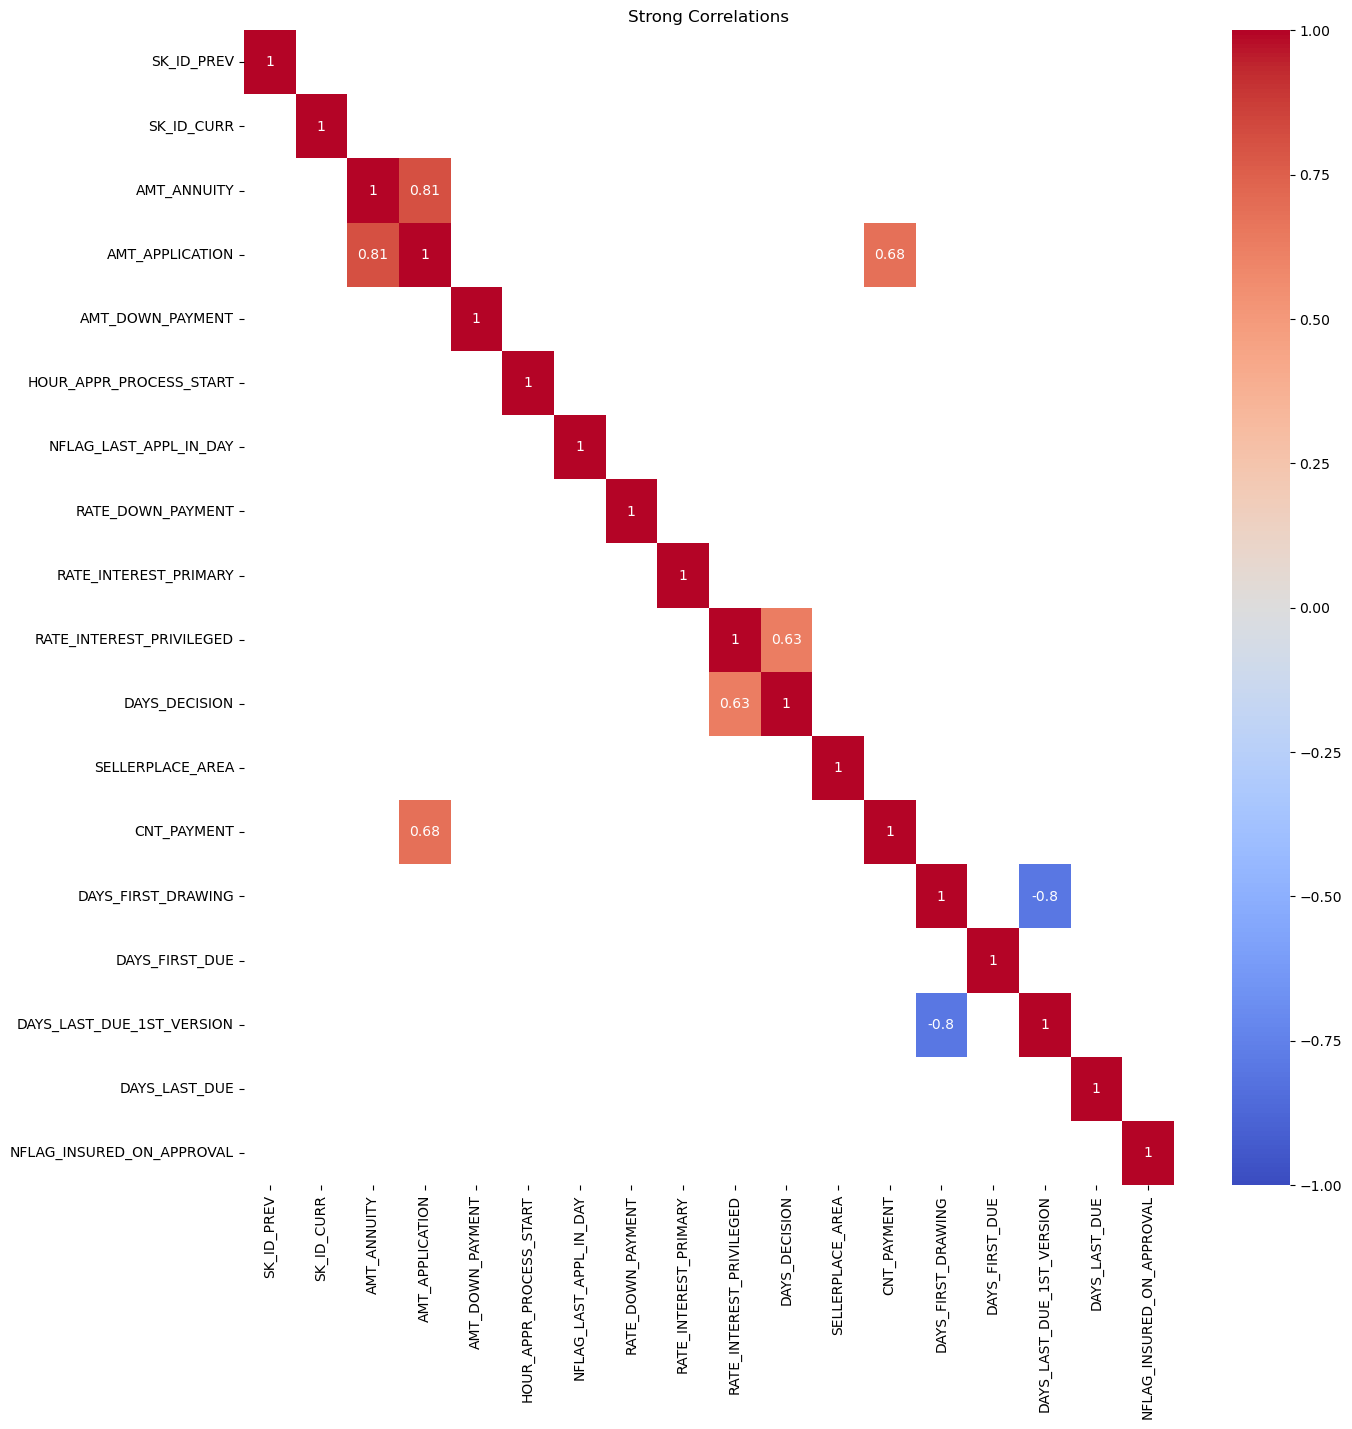

In [71]:
# Looking at just the numerical features to fully understand how these feature effect SalePrice
numerical_features = previous_application.select_dtypes(include=['float64', 'int64'])
# Compute the correlation matrix
correlation_matrix = numerical_features.corr()
# Filter heatmap to show only correlations greater than 0.6
plt.figure(figsize=(15, 15))  # Adjust the figure size to make it more readable
strong_corr = correlation_matrix[(correlation_matrix > 0.6) | (correlation_matrix < -0.6)]
sns.heatmap(strong_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Strong Correlations')
plt.show()

In [72]:
# Set a threshold for strong correlations
threshold = 0.6

# Find strong correlations
strong_correlations = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            strong_correlations.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

# Print the results
for var1, var2, corr in strong_correlations:
    print(f"{var1}, {var2}, {corr}")

AMT_APPLICATION, AMT_ANNUITY, 0.8088724352594298
DAYS_DECISION, RATE_INTEREST_PRIVILEGED, 0.6319397927850259
CNT_PAYMENT, AMT_APPLICATION, 0.6806297548352425
DAYS_LAST_DUE_1ST_VERSION, DAYS_FIRST_DRAWING, -0.8034940594192922


In [73]:
previous_application = previous_application[['SK_ID_CURR', 'AMT_APPLICATION', 'AMT_ANNUITY', 
                                             'NAME_CONTRACT_STATUS', 'DAYS_DECISION']]

The extremely high correlated features that we exclude are: 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'DAYS_TERMINATION'. 

Based on these strong correlations I choose to ignore: RATE_INTEREST_PRIVILEGED, CNT_PAYMENT, DAYS_LAST_DUE_1ST_VERSION, DAYS_FIRST_DRAWING. The last two is because they have a negative correlation which can negatively affect the predicted value, while the others listed can effect the predicted value because of multiculinearlity because of the selected features listed above.

Based on the amount of null values 'AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED' where ignored. 


previous_application_agg = previous_application.groupby('SK_ID_CURR').agg({
    
    'AMT_APPLICATION': ['mean', 'max'],
    
    'AMT_ANNUITY': ['mean', 'max'],
    
    'NAME_CONTRACT_STATUS': ['count'],
    
    'DAYS_DECISION': ['mean', 'min']
}).reset_index()

Same as credit card balance these features capture the trends of these features and if there are any extreme behaviors by looking at the max value. -- ?

In [74]:
df_head5 = previous_application.head()
# Displaying a table in Markdown format to put in .md file
df_head5_md = df_head5.to_markdown(index=False)
Markdown(df_head5_md)

|   SK_ID_CURR |   AMT_APPLICATION |   AMT_ANNUITY | NAME_CONTRACT_STATUS   |   DAYS_DECISION |
|-------------:|------------------:|--------------:|:-----------------------|----------------:|
|       271877 |             17145 |       1730.43 | Approved               |             -73 |
|       108129 |            607500 |      25188.6  | Approved               |            -164 |
|       122040 |            112500 |      15060.7  | Approved               |            -301 |
|       176158 |            450000 |      47041.3  | Approved               |            -512 |
|       202054 |            337500 |      31924.4  | Refused                |            -781 |

In [75]:
display(Markdown("### INFO"))
display(previous_application.info())
display(Markdown("### Description"))
display(previous_application.describe())

### INFO

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 5 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   SK_ID_CURR            1670214 non-null  int64  
 1   AMT_APPLICATION       1670214 non-null  float64
 2   AMT_ANNUITY           1297979 non-null  float64
 3   NAME_CONTRACT_STATUS  1670214 non-null  object 
 4   DAYS_DECISION         1670214 non-null  int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 63.7+ MB


None

### Description

,SK_ID_CURR,AMT_APPLICATION,AMT_ANNUITY,DAYS_DECISION
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06
mean,2.783572e+05,1.752339e+05,1.595512e+04,-8.806797e+02
std,1.028148e+05,2.927798e+05,1.478214e+04,7.790997e+02
min,1.000010e+05,0.000000e+00,0.000000e+00,-2.922000e+03
25%,1.893290e+05,1.872000e+04,6.321780e+03,-1.300000e+03
50%,2.787145e+05,7.104600e+04,1.125000e+04,-5.810000e+02
75%,3.675140e+05,1.803600e+05,2.065842e+04,-2.800000e+02
max,4.562550e+05,6.905160e+06,4.180581e+05,-1.000000e+00


# installments_payments

In [76]:
installments_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB


array([[<Axes: title={'center': 'SK_ID_PREV'}>,
        <Axes: title={'center': 'SK_ID_CURR'}>,
        <Axes: title={'center': 'NUM_INSTALMENT_VERSION'}>],
       [<Axes: title={'center': 'NUM_INSTALMENT_NUMBER'}>,
        <Axes: title={'center': 'DAYS_INSTALMENT'}>,
        <Axes: title={'center': 'DAYS_ENTRY_PAYMENT'}>],
       [<Axes: title={'center': 'AMT_INSTALMENT'}>,
        <Axes: title={'center': 'AMT_PAYMENT'}>, <Axes: >]], dtype=object)

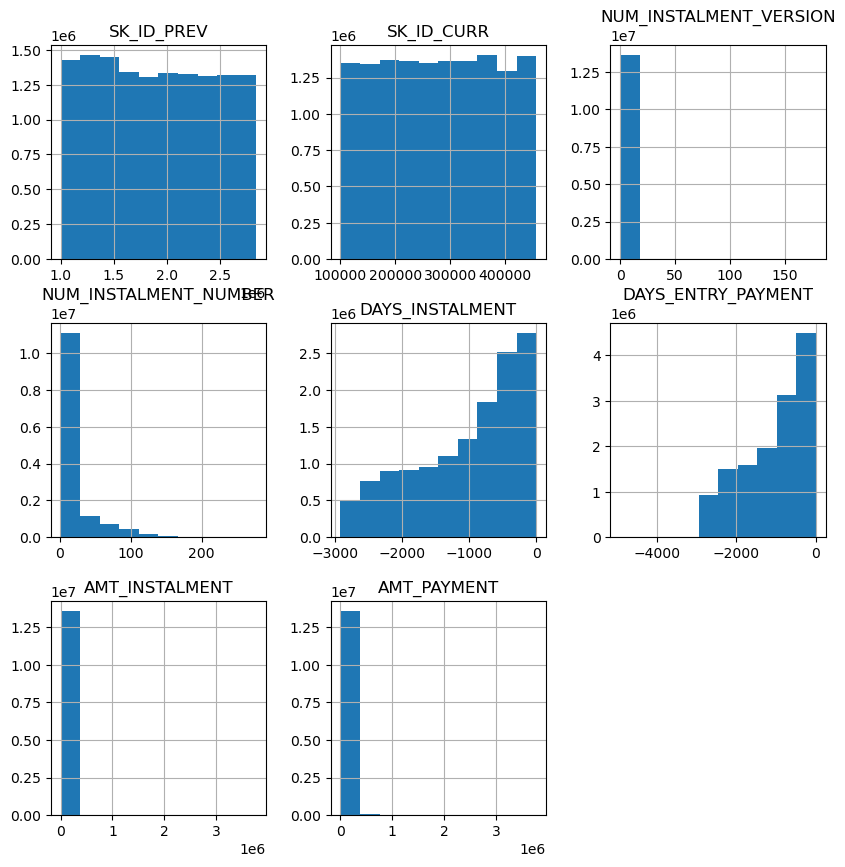

In [77]:
installments_payments.hist(figsize=(10,10))

In [78]:
# Threshold for more than half nulls
threshold = len(installments_payments) / 2

# Find columns with more than half nulls
columns_with_many_nulls = installments_payments.columns[installments_payments.isnull().sum() > threshold]

print("Columns with more than half nulls:", columns_with_many_nulls.tolist())

Columns with more than half nulls: []


In [79]:
# Getting the correlated values
corr_matrix = installments_payments.corr().abs() 
corr_matrix

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
SK_ID_PREV,1.000000,0.002132,0.000685,0.002095,0.003748,0.003734,0.002042,0.001887
SK_ID_CURR,0.002132,1.000000,0.000480,0.000548,0.001191,0.001215,0.000226,0.000124
NUM_INSTALMENT_VERSION,0.000685,0.000480,1.000000,0.323414,0.130244,0.128124,0.168109,0.177176
NUM_INSTALMENT_NUMBER,0.002095,0.000548,0.323414,1.000000,0.090286,0.094305,0.089640,0.087664
DAYS_INSTALMENT,0.003748,0.001191,0.130244,0.090286,1.000000,0.999491,0.125985,0.127018
DAYS_ENTRY_PAYMENT,0.003734,0.001215,0.128124,0.094305,0.999491,1.000000,0.125555,0.126602
AMT_INSTALMENT,0.002042,0.000226,0.168109,0.089640,0.125985,0.125555,1.000000,0.937191
AMT_PAYMENT,0.001887,0.000124,0.177176,0.087664,0.127018,0.126602,0.937191,1.000000


In [80]:
# Getting the upper triangular matrix
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
upper_tri

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
SK_ID_PREV,NaN,0.002132,0.000685,0.002095,0.003748,0.003734,0.002042,0.001887
SK_ID_CURR,NaN,NaN,0.000480,0.000548,0.001191,0.001215,0.000226,0.000124
NUM_INSTALMENT_VERSION,NaN,NaN,NaN,0.323414,0.130244,0.128124,0.168109,0.177176
NUM_INSTALMENT_NUMBER,NaN,NaN,NaN,NaN,0.090286,0.094305,0.089640,0.087664
DAYS_INSTALMENT,NaN,NaN,NaN,NaN,NaN,0.999491,0.125985,0.127018
DAYS_ENTRY_PAYMENT,NaN,NaN,NaN,NaN,NaN,NaN,0.125555,0.126602
AMT_INSTALMENT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.937191
AMT_PAYMENT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
# Checking columns that have a high correlated value of 0.9.
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
to_drop 

['DAYS_ENTRY_PAYMENT', 'AMT_PAYMENT']

In [82]:
installments_payments.drop(columns=to_drop, inplace=True) 
installments_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 6 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   AMT_INSTALMENT          float64
dtypes: float64(3), int64(3)
memory usage: 622.8 MB


In [83]:
# Looking at just the numerical features to fully understand how these feature effect SalePrice
numerical_features = installments_payments.select_dtypes(include=['float64', 'int64'])
# Compute the correlation matrix
correlation_matrix = numerical_features.corr()

# Find correlations
correlations = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        correlations.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

# Print the results
for var1, var2, corr in correlations:
    print(f"{var1}, {var2}, {corr}")

SK_ID_CURR, SK_ID_PREV, 0.0021320397492565245
NUM_INSTALMENT_VERSION, SK_ID_PREV, 0.000684946151406594
NUM_INSTALMENT_VERSION, SK_ID_CURR, 0.00047959207561795096
NUM_INSTALMENT_NUMBER, SK_ID_PREV, -0.0020949032459741165
NUM_INSTALMENT_NUMBER, SK_ID_CURR, -0.0005478323888794754
NUM_INSTALMENT_NUMBER, NUM_INSTALMENT_VERSION, -0.32341426149381486
DAYS_INSTALMENT, SK_ID_PREV, 0.0037481699573771506
DAYS_INSTALMENT, SK_ID_CURR, 0.0011908384247164585
DAYS_INSTALMENT, NUM_INSTALMENT_VERSION, 0.13024407483603717
DAYS_INSTALMENT, NUM_INSTALMENT_NUMBER, 0.09028551979093342
AMT_INSTALMENT, SK_ID_PREV, 0.0020424298941966687
AMT_INSTALMENT, SK_ID_CURR, -0.00022601071187989673
AMT_INSTALMENT, NUM_INSTALMENT_VERSION, 0.1681094381214406
AMT_INSTALMENT, NUM_INSTALMENT_NUMBER, -0.08963994969343103
AMT_INSTALMENT, DAYS_INSTALMENT, 0.12598474769309861


In [84]:
# Selected features
installments_payments = installments_payments[['SK_ID_CURR', 'AMT_INSTALMENT']]
installments_payments.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 2 columns):
 #   Column          Dtype  
---  ------          -----  
 0   SK_ID_CURR      int64  
 1   AMT_INSTALMENT  float64
dtypes: float64(1), int64(1)
memory usage: 207.6 MB


The selected feature that I choose to keep was just 'SK_ID_CURR ' and 'AMT_INSTALMENT' since the 'NUM_INSTALMENT_VERSION' and 'DAYS_INSTALMENT' is not very informative logically speaking. 

installments_agg = installments_payments.groupby('SK_ID_CURR').agg({
    
    'AMT_INSTALMENT': ['mean', 'sum', 'max'],
    
}).reset_index()

-- ?

# bureau_balance

In [85]:
bureau_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB


array([[<Axes: title={'center': 'SK_ID_BUREAU'}>,
        <Axes: title={'center': 'MONTHS_BALANCE'}>]], dtype=object)

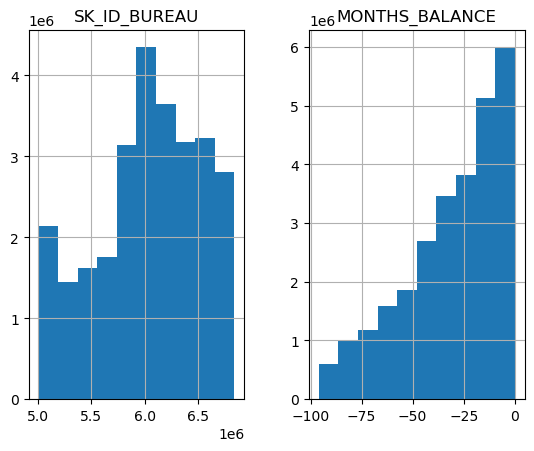

In [86]:
bureau_balance.hist()

Since there is only two features in bureau_balance I decided to keep both features since there both logically important to the model. 

There are two aggregationtions to this table since bureau_balance only has SK_ID_BUREAU as an id so I first aggregaited it to bureau hence the bureau merge to the bureau_balance_agg table. Here is the full block of code that explains it: 


In [87]:
# Threshold for more than half nulls
threshold = len(bureau_balance) / 2

# Find columns with more than half nulls
columns_with_many_nulls = bureau_balance.columns[bureau_balance.isnull().sum() > threshold]

print("Columns with more than half nulls:", columns_with_many_nulls.tolist())

Columns with more than half nulls: []


In [88]:
# Getting the correlated values
corr_matrix = bureau_balance.corr().abs() 
corr_matrix

/var/folders/6j/3l6q9l4515sdmfyg8znhblxr0000gn/T/ipykernel_49090/2801862377.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = bureau_balance.corr().abs()


,SK_ID_BUREAU,MONTHS_BALANCE
SK_ID_BUREAU,1.000000,0.011873
MONTHS_BALANCE,0.011873,1.000000


In [89]:
# Getting the upper triangular matrix
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
upper_tri

,SK_ID_BUREAU,MONTHS_BALANCE
SK_ID_BUREAU,NaN,0.011873
MONTHS_BALANCE,NaN,NaN


In [90]:
# Checking columns that have a high correlated value of 0.9.
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
to_drop 

[]

In [91]:
# Aggregate Bureau Balance Data by SK_ID_BUREAU
bureau_balance_agg = bureau_balance.groupby('SK_ID_BUREAU').agg({
    'MONTHS_BALANCE': ['mean', 'min', 'max'],
    'STATUS': ['count']
}).reset_index()

# Flatten the column names
bureau_balance_agg.columns = ['_'.join(col).strip('_') for col in bureau_balance_agg.columns.values]

# Merge with `bureau` table on `SK_ID_BUREAU`
bureau = bureau.merge(bureau_balance_agg, on='SK_ID_BUREAU', how='left')

# Now check the column names in 'bureau' after the merge
print(bureau.columns)  # This will help you inspect column names

# Further aggregate by `SK_ID_CURR` with correct column names
bureau_agg = bureau.groupby('SK_ID_CURR').agg({
    'MONTHS_BALANCE_mean': 'mean',  # mean of MONTHS_BALANCE_mean
    'MONTHS_BALANCE_max': 'max',    # max of MONTHS_BALANCE_mean
    'STATUS_count': 'sum'           # sum of STATUS_count
}).reset_index()
# Flatten column names again
bureau_agg.columns = ['_'.join(col).strip('_') if isinstance(col, tuple) else col for col in bureau_agg.columns]

# Print the column names to verify
print(bureau_agg.columns)

Index(['SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_ACTIVE', 'DAYS_CREDIT',
       'DAYS_CREDIT_ENDDATE', 'AMT_CREDIT_SUM', 'DAYS_CREDIT_UPDATE',
       'CREDIT_DAY_OVERDUE', 'CREDIT_TYPE', 'DEFAULT_RATE',
       'MONTHS_BALANCE_mean', 'MONTHS_BALANCE_min', 'MONTHS_BALANCE_max',
       'STATUS_count'],
      dtype='object')
Index(['SK_ID_CURR', 'MONTHS_BALANCE_mean', 'MONTHS_BALANCE_max',
       'STATUS_count'],
      dtype='object')


# Target variable Analysis

0    282686
1     24825
Name: TARGET, dtype: int64


<Axes: xlabel='TARGET', ylabel='count'>

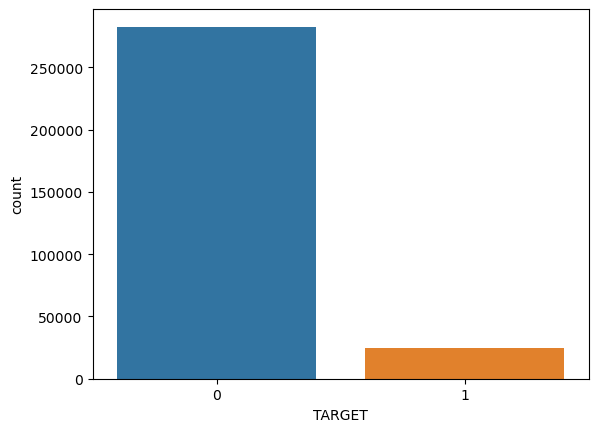

In [92]:
# Looking at the distribuition of the target variable:
print(df_application_train['TARGET'].value_counts())
sns.countplot(df_application_train, x='TARGET')

In [93]:
df_application_train['TARGET'].describe()

count    307511.000000
mean          0.080729
std           0.272419
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: TARGET, dtype: float64

# Other key observations

## relationships between tables

In [99]:
bureau_agg

,SK_ID_CURR,MONTHS_BALANCE_mean,MONTHS_BALANCE_max,STATUS_count
0,100001,-11.785714,0.0,172.0
1,100002,-21.875000,0.0,110.0
2,100003,NaN,NaN,0.0
3,100004,NaN,NaN,0.0
4,100005,-3.000000,0.0,21.0
...,...,...,...,...
305806,456249,NaN,NaN,0.0
305807,456250,-14.000000,0.0,87.0
305808,456253,-14.125000,0.0,117.0
305809,456254,-18.000000,0.0,37.0


KeyError: 'DAYS_CREDIT_mean'

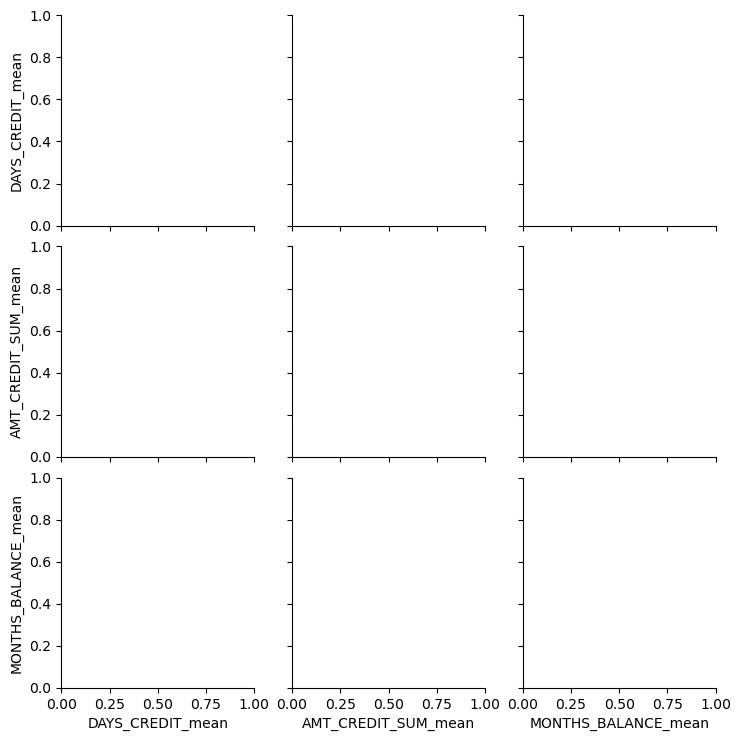

In [98]:
sns.pairplot(bureau_agg, vars=['DAYS_CREDIT_mean', 'AMT_CREDIT_SUM_mean', 'MONTHS_BALANCE_mean'], 
             diag_kind='kde', height=2.5)
plt.suptitle('Pairwise Relationships Between Aggregated Features', y=1.02)
plt.show()


## Distribution of Numerical Features per Target Class

##  Feature Interactions